In [4]:
%load_ext autoreload
%autoreload 2 

## DataPreprocessing

In [5]:
from malwareDetector import malwareDetector
from dataLoader import DatasetLoad
from opcodeVectorize import OpcodeVectorizer

detector = malwareDetector(cluster=False, train=True, val=True, cpuArch="x86_64",
                            support_shots=5, query_shots=5, class_per_iter=20, class_per_iter_test=5,
                            loss="", dataset="diec")

dataset = DatasetLoad(detector)


Loading all datasets...
train dataset shape: (840, 3)
train dataset family number: 42
test dataset shape: (420, 3)
test dataset family number: 21
val dataset shape: (160, 3)
val dataset family number: 8


In [6]:
vectorize = OpcodeVectorizer(method = "tfidf", detector = detector, dataset=dataset)

Vectorizing byte sequence using TF-IDF.


In [7]:
print("Vectorize Method: ", vectorize.vectorize_method)
featureDim = 1000
n_gramRange = (1, 3)
# set numpy show all
import numpy as np
train_X, test_X, val_X, train_y, test_y, val_y, train_map, test_map, val_map = vectorize.vectorize_func(featureDim, n_gramRange)

Vectorize Method:  tfidf
Vectorizing opcode and saving to ./embedding/diec...
840
420
160


: 

In [9]:
print("Train X shape: ", train_X.shape, type(train_X))
print("Train y shape: ", train_y.shape, type(train_y))
# print("Test X shape: ", test_X.shape)
print("Test y shape: ", test_y.shape)
if(val_X is not None):
    print("Val X shape: ", val_X.shape)
    print("Val y shape: ", val_y.shape)
print("Train Map: ", train_map)
print("Test Map: ", test_map)
if(val_map is not None):
    print("Val Map: ", val_map)

Train X shape:  (900, 1000) <class 'numpy.ndarray'>
Train y shape:  (900,) <class 'numpy.ndarray'>
Test y shape:  (440,)
Val X shape:  (140, 1000)
Val y shape:  (140,)
Train Map:  {0: 'aenjaris', 1: 'blueshell', 2: 'bpfdoor', 3: 'chisel', 4: 'cornelgen', 5: 'cryptonote', 6: 'dnsamp', 7: 'dropperl', 8: 'drtycow', 9: 'ezuriloader', 10: 'fritzfrog', 11: 'fscan', 12: 'gafgyt', 13: 'hive', 14: 'horsepill', 15: 'lady', 16: 'malsource', 17: 'mirai', 18: 'pnscan', 19: 'poseidon', 20: 'psybnc', 21: 'race', 22: 'rekoobe', 23: 'revproxy', 24: 'rkit', 25: 'sliver', 26: 'sshbrute', 27: 'sshdoor', 28: 'stowaway', 29: 'triada', 30: 'tsunami', 31: 'vtflooder'}
Test Map:  {0: 'backegmm', 1: 'cobaltstrike', 2: 'dnscat', 3: 'kaiji', 4: 'local', 5: 'malxmr', 6: 'merlin', 7: 'meterpreter', 8: 'ngioweb', 9: 'prochider', 10: 'reversessh', 11: 'sckit', 12: 'vpnfilter', 13: 'winnti', 14: 'xmrig', 15: 'zhtrap'}
Val Map:  {0: 'camelot', 1: 'cleanlog', 2: 'equationdrug', 3: 'exploitscan', 4: 'winexe', 5: 'xorddos

## Data clustering


In [4]:
import os
from cluster import *
from cluster import get_family_index

# get distance
clusterLabel = None

if detector.cluster:
    
    filePrefix = f"{featureDim}_{n_gramRange[0]}_{n_gramRange[1]}"
    if detector.val:
        filePath = f"{detector.clusterDataFolder}/{detector.cpuArch}/{featureDim}_{n_gramRange[0]}_{n_gramRange[1]}_cluster_{detector.cluster_method}_withVal.pickle"
    else:
        filePath = f"{detector.clusterDataFolder}/{detector.cpuArch}/{featureDim}_{n_gramRange[0]}_{n_gramRange[1]}_cluster_{detector.cluster_method}.pickle"
    if os.path.exists(filePath):
        clusterLabel = np.load(filePath, allow_pickle=True)
    else:
        get_family_index(train_y, train_map, detector, filePrefix)


ModuleNotFoundError: No module named 'matplotlib'

2024-07-30 13:43:32,041 : INFO : PROGRESS: load data
2024-07-30 13:43:32,042 : INFO : PROGRESS: load end
2024-07-30 13:43:32,043 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,043 : INFO : PROGRESS: dc - 0.004105452254752406
2024-07-30 13:43:32,043 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,043 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:32,044 : INFO : PROGRESS: load data
2024-07-30 13:43:32,045 : INFO : PROGRESS: load end
2024-07-30 13:43:32,045 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,045 : INFO : PROGRESS: dc - 0.004105452254752406
2024-07-30 13:43:32,046 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,046 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:32,046 : INFO : PROGRESS: start cluster
2024-07-30 13:43:32,047 : INFO : PROGRESS: ended
2024-07-30 13:43:32,047 : INFO : 1 center as below
2024-07-30 13:43:32,047 : INFO : 9 1.935985 1.353445
2024-07-30 13:

./clusterData/crossArch/1000_2_4_aenjaris.dat already exists.
./clusterData/crossArch/1000_2_4_blueshell.dat already exists.
./clusterData/crossArch/1000_2_4_bpfdoor.dat already exists.
./clusterData/crossArch/1000_2_4_chisel.dat already exists.
./clusterData/crossArch/1000_2_4_cornelgen.dat already exists.
./clusterData/crossArch/1000_2_4_cryptonote.dat already exists.
./clusterData/crossArch/1000_2_4_dnsamp.dat already exists.
./clusterData/crossArch/1000_2_4_dropperl.dat already exists.
./clusterData/crossArch/1000_2_4_drtycow.dat already exists.
./clusterData/crossArch/1000_2_4_ezuriloader.dat already exists.
./clusterData/crossArch/1000_2_4_fritzfrog.dat already exists.
./clusterData/crossArch/1000_2_4_fscan.dat already exists.
./clusterData/crossArch/1000_2_4_gafgyt.dat already exists.
./clusterData/crossArch/1000_2_4_hive.dat already exists.
./clusterData/crossArch/1000_2_4_horsepill.dat already exists.
./clusterData/crossArch/1000_2_4_lady.dat already exists.
./clusterData/cros

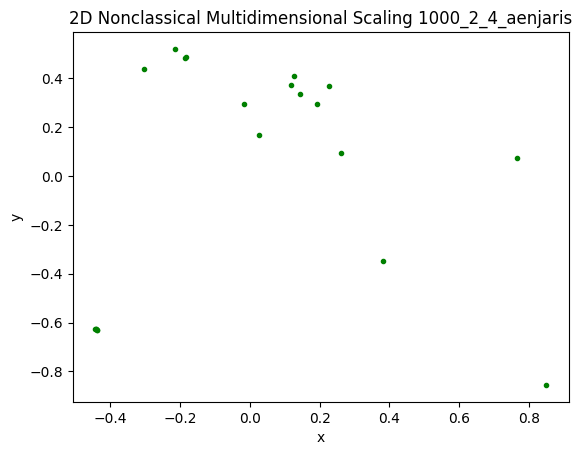

2024-07-30 13:43:32,210 : INFO : PROGRESS: load data
2024-07-30 13:43:32,211 : INFO : PROGRESS: load end
2024-07-30 13:43:32,211 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,211 : INFO : PROGRESS: dc - 0.0
2024-07-30 13:43:32,212 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,212 : INFO : PROGRESS: load data
2024-07-30 13:43:32,213 : INFO : PROGRESS: load end
2024-07-30 13:43:32,213 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,213 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,214 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:32,214 : INFO : PROGRESS: load data
2024-07-30 13:43:32,215 : INFO : PROGRESS: load end
2024-07-30 13:43:32,215 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,216 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,216 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:32,216 : INFO : PROGRESS: start cluster
2024-07-30 13:43:32,217 : INFO

CPU architecture number of blueshell is 1
Cluster number of blueshell is 1
Threshold of blueshell: density 3.0, distance 1.30631422996521


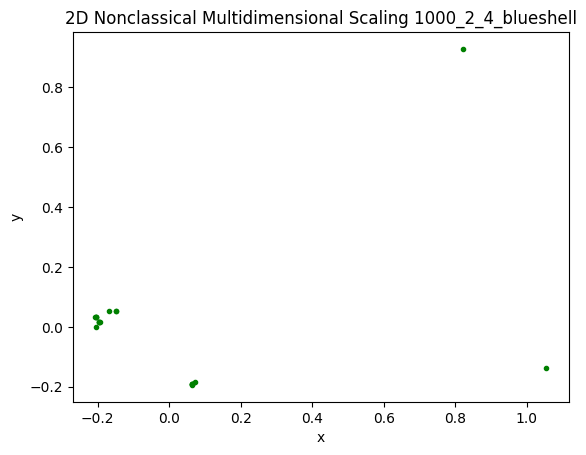

2024-07-30 13:43:32,370 : INFO : PROGRESS: load data
2024-07-30 13:43:32,370 : INFO : PROGRESS: load end
2024-07-30 13:43:32,371 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,371 : INFO : PROGRESS: dc - 0.005616176767184891
2024-07-30 13:43:32,371 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,372 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:32,372 : INFO : PROGRESS: load data
2024-07-30 13:43:32,373 : INFO : PROGRESS: load end
2024-07-30 13:43:32,373 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,373 : INFO : PROGRESS: dc - 0.005616176767184891
2024-07-30 13:43:32,374 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,374 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:32,374 : INFO : PROGRESS: start cluster
2024-07-30 13:43:32,375 : INFO : PROGRESS: ended
2024-07-30 13:43:32,375 : INFO : 1 center as below
2024-07-30 13:43:32,375 : INFO : 9 1.959284 0.988000
2024-07-30 13:

CPU architecture number of bpfdoor is 1
Cluster number of bpfdoor is 1
Threshold of bpfdoor: density 1.9592844247817993, distance 0.9880002737045288


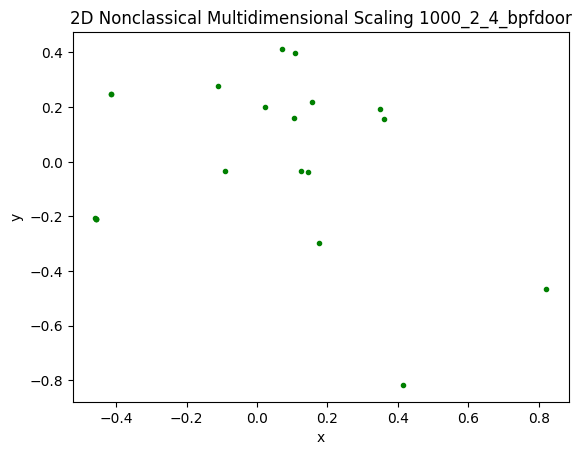

2024-07-30 13:43:32,532 : INFO : PROGRESS: load data
2024-07-30 13:43:32,533 : INFO : PROGRESS: load end
2024-07-30 13:43:32,533 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,534 : INFO : PROGRESS: dc - 0.0
2024-07-30 13:43:32,534 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,534 : INFO : PROGRESS: load data
2024-07-30 13:43:32,535 : INFO : PROGRESS: load end
2024-07-30 13:43:32,535 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,535 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,536 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:32,537 : INFO : PROGRESS: load data
2024-07-30 13:43:32,537 : INFO : PROGRESS: load end
2024-07-30 13:43:32,538 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,538 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,538 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:32,539 : INFO : PROGRESS: start cluster
2024-07-30 13:43:32,539 : INFO

CPU architecture number of chisel is 1
Cluster number of chisel is 1
Threshold of chisel: density 6.0, distance 1.1540061235427856


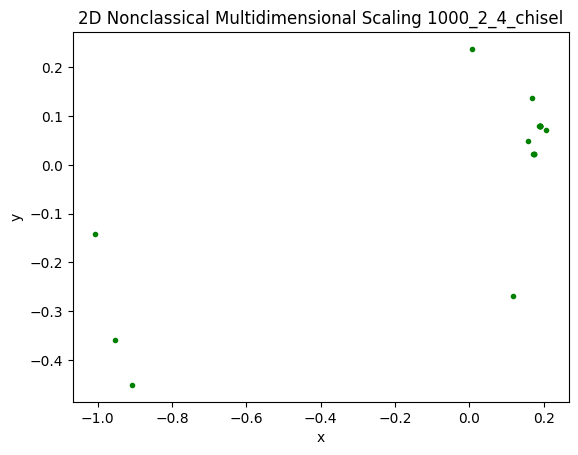

2024-07-30 13:43:32,700 : INFO : PROGRESS: load data
2024-07-30 13:43:32,700 : INFO : PROGRESS: load end
2024-07-30 13:43:32,701 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,701 : INFO : PROGRESS: dc - 0.5273183598485307
2024-07-30 13:43:32,701 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,702 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:32,702 : INFO : PROGRESS: load data
2024-07-30 13:43:32,703 : INFO : PROGRESS: load end
2024-07-30 13:43:32,703 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,704 : INFO : PROGRESS: dc - 0.5273183598485307
2024-07-30 13:43:32,704 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,704 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:32,705 : INFO : PROGRESS: start cluster
2024-07-30 13:43:32,705 : INFO : PROGRESS: ended
2024-07-30 13:43:32,705 : INFO : 1 center as below
2024-07-30 13:43:32,706 : INFO : 1 1.823553 1.084283
2024-07-30 13:43:3

CPU architecture number of cornelgen is 1
Cluster number of cornelgen is 1
Threshold of cornelgen: density 1.8235529661178589, distance 1.0842833518981934


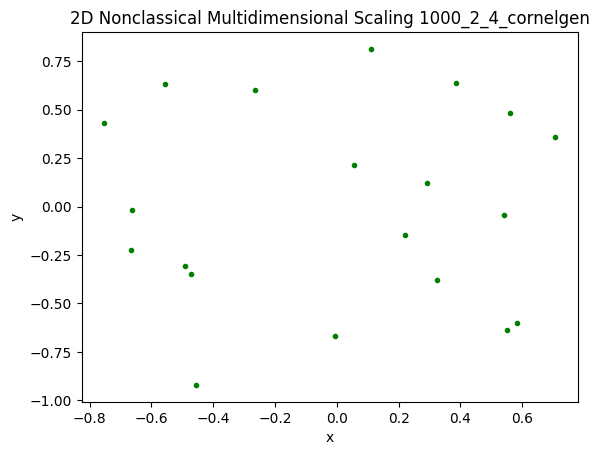

2024-07-30 13:43:32,893 : INFO : PROGRESS: load data
2024-07-30 13:43:32,894 : INFO : PROGRESS: load end
2024-07-30 13:43:32,894 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,894 : INFO : PROGRESS: dc - 0.20420248375292718
2024-07-30 13:43:32,894 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,895 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:32,895 : INFO : PROGRESS: load data
2024-07-30 13:43:32,896 : INFO : PROGRESS: load end
2024-07-30 13:43:32,896 : INFO : PROGRESS: select dc
2024-07-30 13:43:32,897 : INFO : PROGRESS: dc - 0.20420248375292718
2024-07-30 13:43:32,897 : INFO : PROGRESS: compute local density
2024-07-30 13:43:32,897 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:32,898 : INFO : PROGRESS: start cluster
2024-07-30 13:43:32,898 : INFO : PROGRESS: ended
2024-07-30 13:43:32,898 : INFO : 1 center as below
2024-07-30 13:43:32,898 : INFO : 16 1.485997 0.626402
2024-07-30 13:4

CPU architecture number of cryptonote is 1
Cluster number of cryptonote is 1
Threshold of cryptonote: density 1.485996961593628, distance 0.6264016032218933


2024-07-30 13:43:32,913 : INFO : PLOT: end mds, start plot


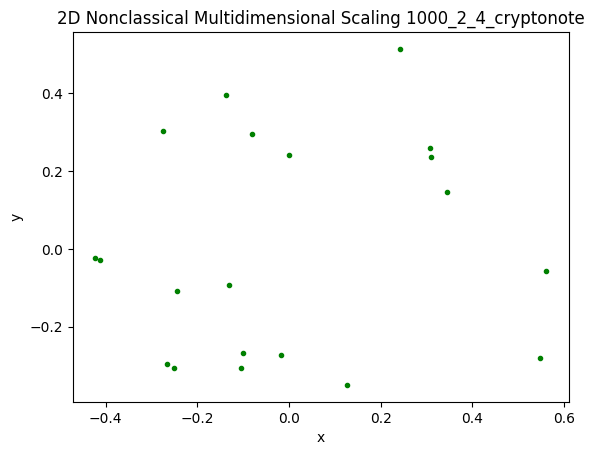

2024-07-30 13:43:33,186 : INFO : PROGRESS: load data
2024-07-30 13:43:33,188 : INFO : PROGRESS: load end
2024-07-30 13:43:33,188 : INFO : PROGRESS: select dc
2024-07-30 13:43:33,188 : INFO : PROGRESS: dc - 0.30445343839707706
2024-07-30 13:43:33,188 : INFO : PROGRESS: compute local density
2024-07-30 13:43:33,189 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:33,190 : INFO : PROGRESS: load data
2024-07-30 13:43:33,192 : INFO : PROGRESS: load end
2024-07-30 13:43:33,192 : INFO : PROGRESS: select dc
2024-07-30 13:43:33,193 : INFO : PROGRESS: dc - 0.30445343839707706
2024-07-30 13:43:33,193 : INFO : PROGRESS: compute local density
2024-07-30 13:43:33,193 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:33,194 : INFO : PROGRESS: start cluster
2024-07-30 13:43:33,194 : INFO : PROGRESS: ended
2024-07-30 13:43:33,195 : INFO : 2 center as below
2024-07-30 13:43:33,195 : INFO : 3 1.623885 1.007964
2024-07-30 13:43

CPU architecture number of dnsamp is 2
Cluster number of dnsamp is 2
Threshold of dnsamp: density 1.6238853931427002, distance 1.00796377658844


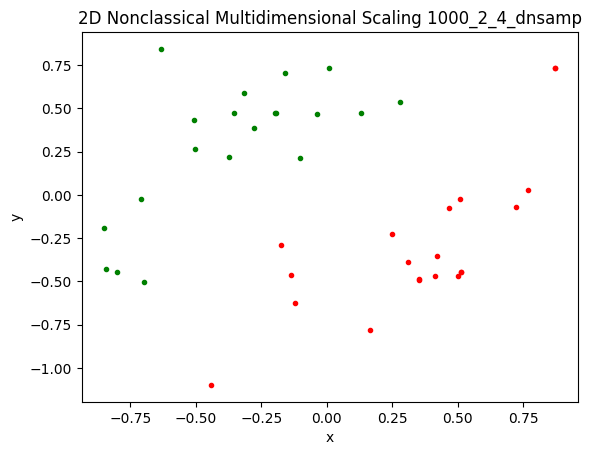

2024-07-30 13:43:33,375 : INFO : PROGRESS: load data
2024-07-30 13:43:33,375 : INFO : PROGRESS: load end
2024-07-30 13:43:33,376 : INFO : PROGRESS: select dc
2024-07-30 13:43:33,376 : INFO : PROGRESS: dc - 0.006394764401750086
2024-07-30 13:43:33,376 : INFO : PROGRESS: compute local density
2024-07-30 13:43:33,376 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:33,377 : INFO : PROGRESS: load data
2024-07-30 13:43:33,378 : INFO : PROGRESS: load end
2024-07-30 13:43:33,378 : INFO : PROGRESS: select dc
2024-07-30 13:43:33,379 : INFO : PROGRESS: dc - 0.006394764401750086
2024-07-30 13:43:33,379 : INFO : PROGRESS: compute local density
2024-07-30 13:43:33,379 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:33,379 : INFO : PROGRESS: start cluster
2024-07-30 13:43:33,380 : INFO : PROGRESS: ended
2024-07-30 13:43:33,380 : INFO : 1 center as below
2024-07-30 13:43:33,380 : INFO : 8 2.837636 0.202349
2024-07-30 13:

CPU architecture number of dropperl is 1
Cluster number of dropperl is 1
Threshold of dropperl: density 2.8376362323760986, distance 0.20234887301921844


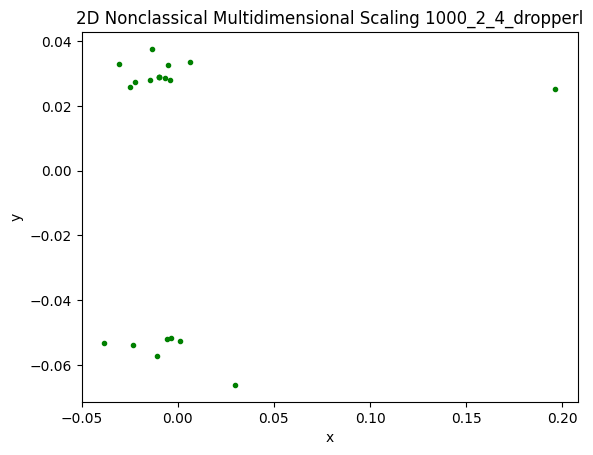

2024-07-30 13:43:33,537 : INFO : PROGRESS: load data
2024-07-30 13:43:33,538 : INFO : PROGRESS: load end
2024-07-30 13:43:33,538 : INFO : PROGRESS: select dc
2024-07-30 13:43:33,538 : INFO : PROGRESS: dc - 0.010524521330029174
2024-07-30 13:43:33,538 : INFO : PROGRESS: compute local density
2024-07-30 13:43:33,539 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:33,539 : INFO : PROGRESS: load data
2024-07-30 13:43:33,540 : INFO : PROGRESS: load end
2024-07-30 13:43:33,540 : INFO : PROGRESS: select dc
2024-07-30 13:43:33,541 : INFO : PROGRESS: dc - 0.010524521330029174
2024-07-30 13:43:33,541 : INFO : PROGRESS: compute local density
2024-07-30 13:43:33,541 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:33,542 : INFO : PROGRESS: start cluster
2024-07-30 13:43:33,542 : INFO : PROGRESS: ended
2024-07-30 13:43:33,542 : INFO : 1 center as below
2024-07-30 13:43:33,542 : INFO : 17 1.809717 0.532259
2024-07-30 13

CPU architecture number of drtycow is 1
Cluster number of drtycow is 1
Threshold of drtycow: density 1.8097169399261475, distance 0.532258927822113


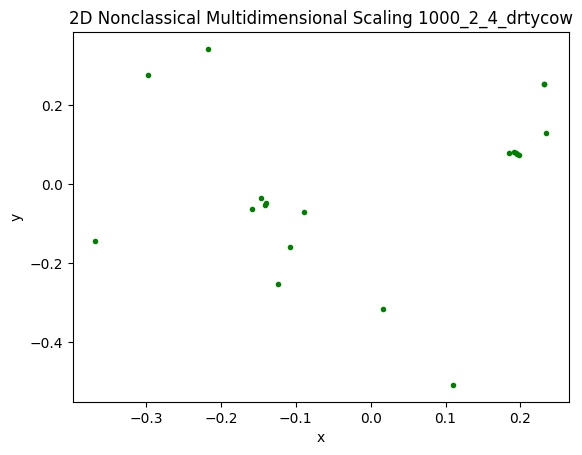

2024-07-30 13:43:33,686 : INFO : PROGRESS: load data
2024-07-30 13:43:33,687 : INFO : PROGRESS: load end
2024-07-30 13:43:33,687 : INFO : PROGRESS: select dc
2024-07-30 13:43:33,688 : INFO : PROGRESS: dc - 0.0
2024-07-30 13:43:33,688 : INFO : PROGRESS: compute local density
2024-07-30 13:43:33,688 : INFO : PROGRESS: load data
2024-07-30 13:43:33,689 : INFO : PROGRESS: load end
2024-07-30 13:43:33,689 : INFO : PROGRESS: select dc
2024-07-30 13:43:33,689 : INFO : PROGRESS: compute local density
2024-07-30 13:43:33,690 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:33,690 : INFO : PROGRESS: load data
2024-07-30 13:43:33,691 : INFO : PROGRESS: load end
2024-07-30 13:43:33,691 : INFO : PROGRESS: select dc
2024-07-30 13:43:33,692 : INFO : PROGRESS: compute local density
2024-07-30 13:43:33,692 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:33,692 : INFO : PROGRESS: start cluster
2024-07-30 13:43:33,693 : INFO

CPU architecture number of ezuriloader is 1
Cluster number of ezuriloader is 1
Threshold of ezuriloader: density 3.0, distance 0.35557040572166443


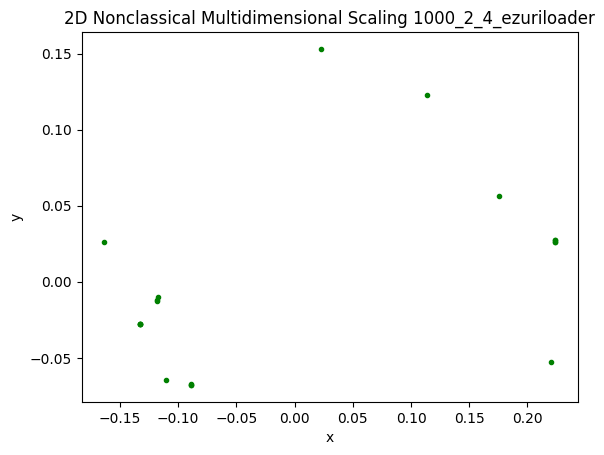

2024-07-30 13:43:33,846 : INFO : PROGRESS: load data
2024-07-30 13:43:33,846 : INFO : PROGRESS: load end
2024-07-30 13:43:33,847 : INFO : PROGRESS: select dc
2024-07-30 13:43:33,847 : INFO : PROGRESS: dc - 0.0
2024-07-30 13:43:33,847 : INFO : PROGRESS: compute local density
2024-07-30 13:43:33,847 : INFO : PROGRESS: load data
2024-07-30 13:43:33,848 : INFO : PROGRESS: load end
2024-07-30 13:43:33,848 : INFO : PROGRESS: select dc
2024-07-30 13:43:33,849 : INFO : PROGRESS: compute local density
2024-07-30 13:43:33,849 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:33,850 : INFO : PROGRESS: load data
2024-07-30 13:43:33,851 : INFO : PROGRESS: load end
2024-07-30 13:43:33,851 : INFO : PROGRESS: select dc
2024-07-30 13:43:33,851 : INFO : PROGRESS: compute local density
2024-07-30 13:43:33,852 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:33,852 : INFO : PROGRESS: start cluster
2024-07-30 13:43:33,852 : INFO

CPU architecture number of fritzfrog is 1
Cluster number of fritzfrog is 1
Threshold of fritzfrog: density 4.0, distance 1.2164443731307983


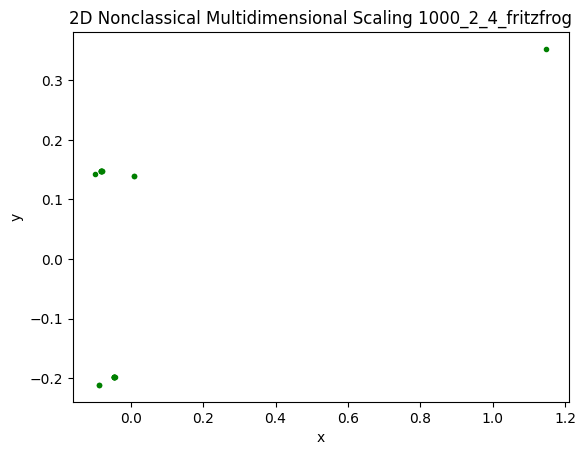

2024-07-30 13:43:34,008 : INFO : PROGRESS: load data
2024-07-30 13:43:34,009 : INFO : PROGRESS: load end
2024-07-30 13:43:34,009 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,009 : INFO : PROGRESS: dc - 0.0
2024-07-30 13:43:34,009 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,010 : INFO : PROGRESS: load data
2024-07-30 13:43:34,010 : INFO : PROGRESS: load end
2024-07-30 13:43:34,011 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,011 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,011 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:34,012 : INFO : PROGRESS: load data
2024-07-30 13:43:34,013 : INFO : PROGRESS: load end
2024-07-30 13:43:34,013 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,013 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,014 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:34,014 : INFO : PROGRESS: start cluster
2024-07-30 13:43:34,014 : INFO

CPU architecture number of fscan is 1
Cluster number of fscan is 1
Threshold of fscan: density 6.0, distance 0.07018163055181503


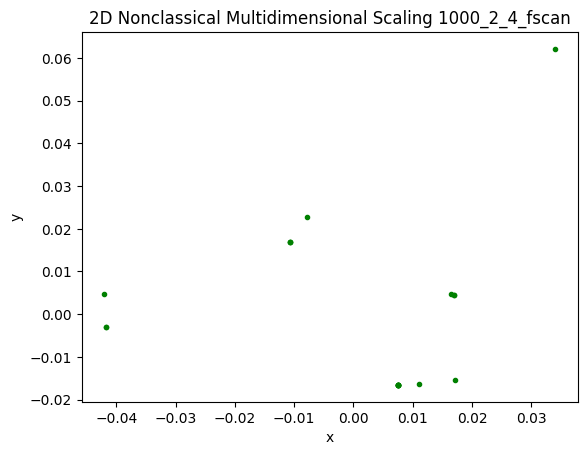

2024-07-30 13:43:34,187 : INFO : PROGRESS: load data
2024-07-30 13:43:34,193 : INFO : PROGRESS: load end
2024-07-30 13:43:34,193 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,194 : INFO : PROGRESS: dc - 0.1445668250817173
2024-07-30 13:43:34,194 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,196 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:34,198 : INFO : PROGRESS: load data
2024-07-30 13:43:34,205 : INFO : PROGRESS: load end
2024-07-30 13:43:34,205 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,206 : INFO : PROGRESS: dc - 0.1445668250817173
2024-07-30 13:43:34,206 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,208 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:34,210 : INFO : PROGRESS: start cluster
2024-07-30 13:43:34,211 : INFO : PROGRESS: ended
2024-07-30 13:43:34,211 : INFO : 4 center as below
2024-07-30 13:43:34,211 : INFO : 18 2.518385 1.206580
2024-07-30 13:43:

CPU architecture number of gafgyt is 4
Cluster number of gafgyt is 4
Threshold of gafgyt: density 2.5183849334716797, distance 1.0651555061340332


2024-07-30 13:43:34,238 : INFO : PLOT: end mds, start plot


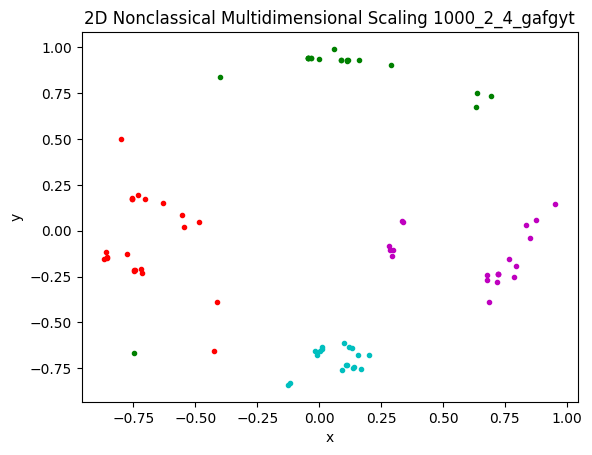

2024-07-30 13:43:34,424 : INFO : PROGRESS: load data
2024-07-30 13:43:34,425 : INFO : PROGRESS: load end
2024-07-30 13:43:34,425 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,425 : INFO : PROGRESS: dc - 0.0
2024-07-30 13:43:34,425 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,425 : INFO : PROGRESS: load data
2024-07-30 13:43:34,426 : INFO : PROGRESS: load end
2024-07-30 13:43:34,427 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,427 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,428 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:34,428 : INFO : PROGRESS: load data
2024-07-30 13:43:34,429 : INFO : PROGRESS: load end
2024-07-30 13:43:34,429 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,430 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,430 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:34,430 : INFO : PROGRESS: start cluster
2024-07-30 13:43:34,431 : INFO

CPU architecture number of hive is 1
Cluster number of hive is 1
Threshold of hive: density 3.0, distance 1.3194632530212402


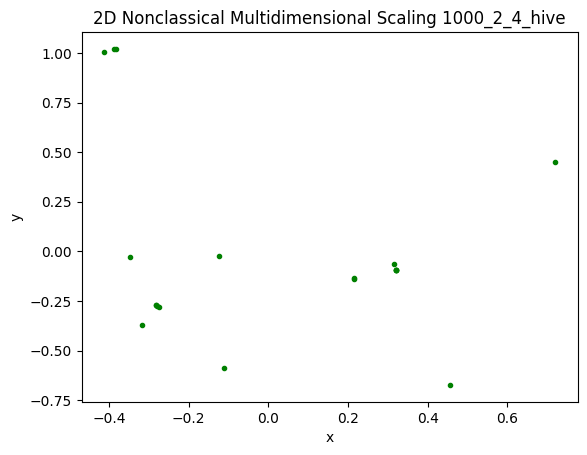

2024-07-30 13:43:34,591 : INFO : PROGRESS: load data
2024-07-30 13:43:34,592 : INFO : PROGRESS: load end
2024-07-30 13:43:34,592 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,592 : INFO : PROGRESS: dc - 0.13047487421790074
2024-07-30 13:43:34,592 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,593 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:34,593 : INFO : PROGRESS: load data
2024-07-30 13:43:34,594 : INFO : PROGRESS: load end
2024-07-30 13:43:34,594 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,595 : INFO : PROGRESS: dc - 0.13047487421790074
2024-07-30 13:43:34,595 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,595 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:34,596 : INFO : PROGRESS: start cluster
2024-07-30 13:43:34,596 : INFO : PROGRESS: ended
2024-07-30 13:43:34,596 : INFO : 1 center as below
2024-07-30 13:43:34,597 : INFO : 6 2.164420 0.724075
2024-07-30 13:43

CPU architecture number of horsepill is 1
Cluster number of horsepill is 1
Threshold of horsepill: density 2.1644203662872314, distance 0.7240749001502991


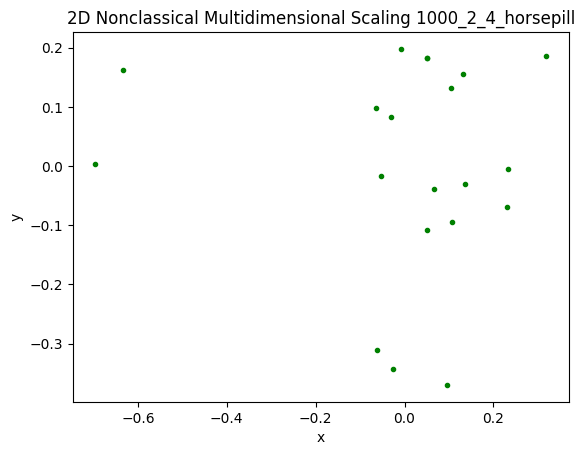

2024-07-30 13:43:34,749 : INFO : PROGRESS: load data
2024-07-30 13:43:34,750 : INFO : PROGRESS: load end
2024-07-30 13:43:34,750 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,750 : INFO : PROGRESS: dc - 0.0
2024-07-30 13:43:34,751 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,751 : INFO : PROGRESS: load data
2024-07-30 13:43:34,752 : INFO : PROGRESS: load end
2024-07-30 13:43:34,752 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,752 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,753 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:34,753 : INFO : PROGRESS: load data
2024-07-30 13:43:34,754 : INFO : PROGRESS: load end
2024-07-30 13:43:34,754 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,755 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,755 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:34,755 : INFO : PROGRESS: start cluster
2024-07-30 13:43:34,756 : INFO

CPU architecture number of lady is 1
Cluster number of lady is 1
Threshold of lady: density 3.0, distance 1.3843063116073608


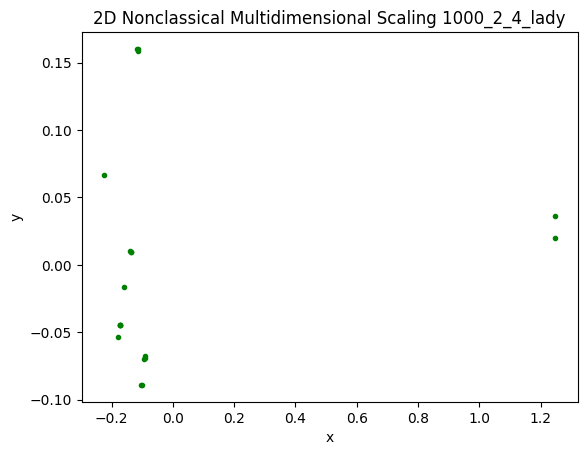

2024-07-30 13:43:34,911 : INFO : PROGRESS: load data
2024-07-30 13:43:34,912 : INFO : PROGRESS: load end
2024-07-30 13:43:34,912 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,912 : INFO : PROGRESS: dc - 0.011993624548491066
2024-07-30 13:43:34,912 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,913 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:34,913 : INFO : PROGRESS: load data
2024-07-30 13:43:34,914 : INFO : PROGRESS: load end
2024-07-30 13:43:34,915 : INFO : PROGRESS: select dc
2024-07-30 13:43:34,915 : INFO : PROGRESS: dc - 0.011993624548491066
2024-07-30 13:43:34,915 : INFO : PROGRESS: compute local density
2024-07-30 13:43:34,915 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:34,916 : INFO : PROGRESS: start cluster
2024-07-30 13:43:34,916 : INFO : PROGRESS: ended
2024-07-30 13:43:34,916 : INFO : 1 center as below
2024-07-30 13:43:34,917 : INFO : 12 1.835216 1.206764
2024-07-30 13

CPU architecture number of malsource is 1
Cluster number of malsource is 1
Threshold of malsource: density 1.8352162837982178, distance 1.2067641019821167


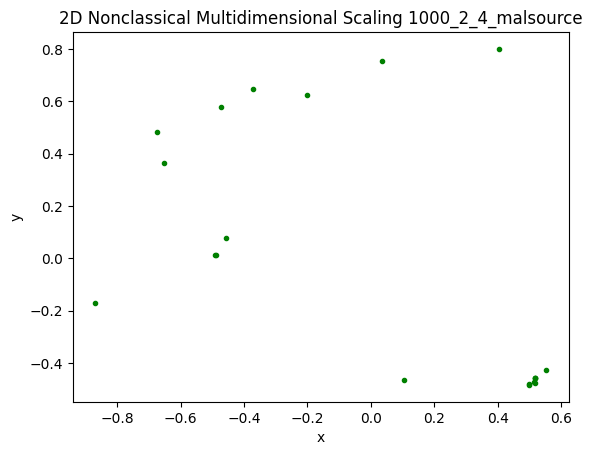

2024-07-30 13:43:35,082 : INFO : PROGRESS: load data
2024-07-30 13:43:35,088 : INFO : PROGRESS: load end
2024-07-30 13:43:35,088 : INFO : PROGRESS: select dc
2024-07-30 13:43:35,089 : INFO : PROGRESS: dc - 0.3096054144741246
2024-07-30 13:43:35,089 : INFO : PROGRESS: compute local density
2024-07-30 13:43:35,091 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:35,093 : INFO : PROGRESS: load data
2024-07-30 13:43:35,100 : INFO : PROGRESS: load end
2024-07-30 13:43:35,100 : INFO : PROGRESS: select dc
2024-07-30 13:43:35,101 : INFO : PROGRESS: dc - 0.3096054144741246
2024-07-30 13:43:35,101 : INFO : PROGRESS: compute local density
2024-07-30 13:43:35,103 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:35,104 : INFO : PROGRESS: start cluster
2024-07-30 13:43:35,105 : INFO : PROGRESS: ended
2024-07-30 13:43:35,106 : INFO : 4 center as below
2024-07-30 13:43:35,106 : INFO : 1 3.342244 1.289815
2024-07-30 13:43:3

CPU architecture number of mirai is 4
Cluster number of mirai is 4
Threshold of mirai: density 3.1845057010650635, distance 0.8822703957557678


2024-07-30 13:43:35,146 : INFO : PLOT: end mds, start plot


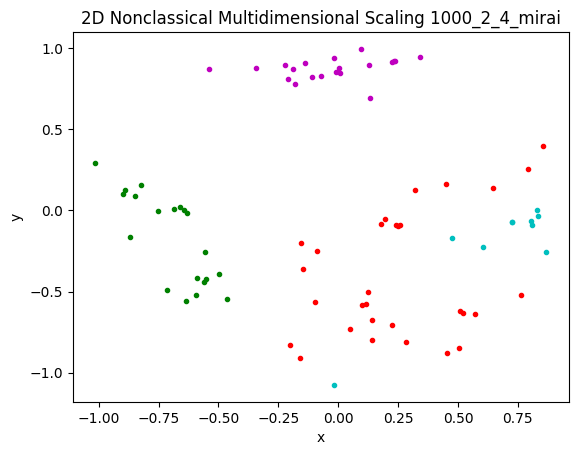

2024-07-30 13:43:35,320 : INFO : PROGRESS: load data
2024-07-30 13:43:35,322 : INFO : PROGRESS: load end
2024-07-30 13:43:35,323 : INFO : PROGRESS: select dc
2024-07-30 13:43:35,323 : INFO : PROGRESS: dc - 0.18709256402330546
2024-07-30 13:43:35,323 : INFO : PROGRESS: compute local density
2024-07-30 13:43:35,324 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:35,325 : INFO : PROGRESS: load data
2024-07-30 13:43:35,327 : INFO : PROGRESS: load end
2024-07-30 13:43:35,327 : INFO : PROGRESS: select dc
2024-07-30 13:43:35,328 : INFO : PROGRESS: dc - 0.18709256402330546
2024-07-30 13:43:35,328 : INFO : PROGRESS: compute local density
2024-07-30 13:43:35,328 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:35,329 : INFO : PROGRESS: start cluster
2024-07-30 13:43:35,329 : INFO : PROGRESS: ended
2024-07-30 13:43:35,330 : INFO : 2 center as below
2024-07-30 13:43:35,330 : INFO : 12 1.227872 1.075120
2024-07-30 13:4

CPU architecture number of pnscan is 2
Cluster number of pnscan is 2
Threshold of pnscan: density 1.2278721332550049, distance 1.075120210647583


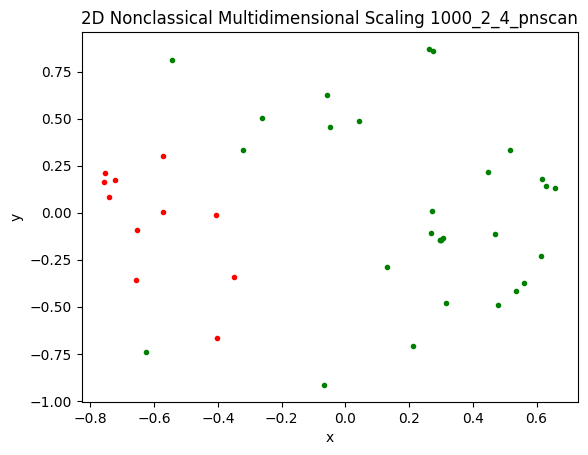

2024-07-30 13:43:35,524 : INFO : PROGRESS: load data
2024-07-30 13:43:35,525 : INFO : PROGRESS: load end
2024-07-30 13:43:35,525 : INFO : PROGRESS: select dc
2024-07-30 13:43:35,526 : INFO : PROGRESS: dc - 0.009607937652613259
2024-07-30 13:43:35,526 : INFO : PROGRESS: compute local density
2024-07-30 13:43:35,526 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:35,527 : INFO : PROGRESS: load data
2024-07-30 13:43:35,528 : INFO : PROGRESS: load end
2024-07-30 13:43:35,528 : INFO : PROGRESS: select dc
2024-07-30 13:43:35,528 : INFO : PROGRESS: dc - 0.009607937652613259
2024-07-30 13:43:35,528 : INFO : PROGRESS: compute local density
2024-07-30 13:43:35,529 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:35,529 : INFO : PROGRESS: start cluster
2024-07-30 13:43:35,529 : INFO : PROGRESS: ended
2024-07-30 13:43:35,530 : INFO : 1 center as below
2024-07-30 13:43:35,530 : INFO : 1 2.023648 0.961337
2024-07-30 13:

CPU architecture number of poseidon is 1
Cluster number of poseidon is 1
Threshold of poseidon: density 2.0236477851867676, distance 0.9613372087478638


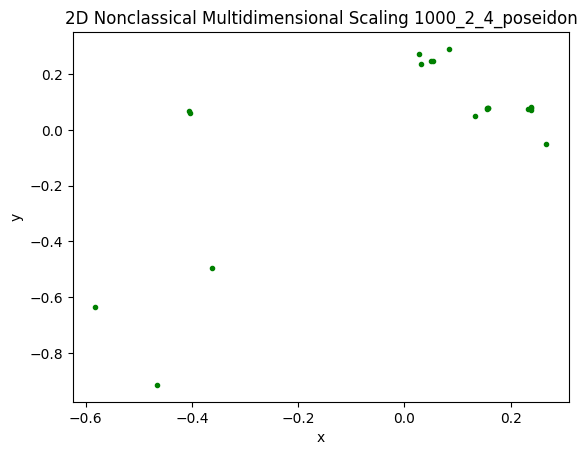

2024-07-30 13:43:35,676 : INFO : PROGRESS: load data
2024-07-30 13:43:35,677 : INFO : PROGRESS: load end
2024-07-30 13:43:35,677 : INFO : PROGRESS: select dc
2024-07-30 13:43:35,678 : INFO : PROGRESS: dc - 0.005044257910443659
2024-07-30 13:43:35,678 : INFO : PROGRESS: compute local density
2024-07-30 13:43:35,678 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:35,679 : INFO : PROGRESS: load data
2024-07-30 13:43:35,680 : INFO : PROGRESS: load end
2024-07-30 13:43:35,680 : INFO : PROGRESS: select dc
2024-07-30 13:43:35,680 : INFO : PROGRESS: dc - 0.005044257910443659
2024-07-30 13:43:35,681 : INFO : PROGRESS: compute local density
2024-07-30 13:43:35,681 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:35,681 : INFO : PROGRESS: start cluster
2024-07-30 13:43:35,682 : INFO : PROGRESS: ended
2024-07-30 13:43:35,682 : INFO : 1 center as below
2024-07-30 13:43:35,682 : INFO : 3 2.367881 0.522795
2024-07-30 13:

CPU architecture number of psybnc is 1
Cluster number of psybnc is 1
Threshold of psybnc: density 2.3678812980651855, distance 0.5227949023246765


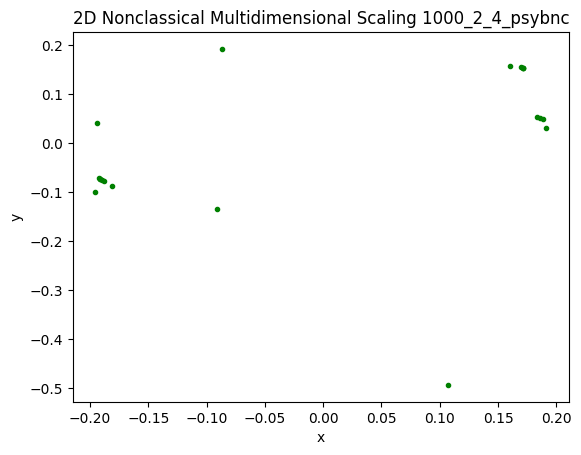

2024-07-30 13:43:35,851 : INFO : PROGRESS: load data
2024-07-30 13:43:35,851 : INFO : PROGRESS: load end
2024-07-30 13:43:35,852 : INFO : PROGRESS: select dc
2024-07-30 13:43:35,852 : INFO : PROGRESS: dc - 0.019681841186303197
2024-07-30 13:43:35,852 : INFO : PROGRESS: compute local density
2024-07-30 13:43:35,852 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:35,853 : INFO : PROGRESS: load data
2024-07-30 13:43:35,854 : INFO : PROGRESS: load end
2024-07-30 13:43:35,854 : INFO : PROGRESS: select dc
2024-07-30 13:43:35,854 : INFO : PROGRESS: dc - 0.019681841186303197
2024-07-30 13:43:35,855 : INFO : PROGRESS: compute local density
2024-07-30 13:43:35,855 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:35,855 : INFO : PROGRESS: start cluster
2024-07-30 13:43:35,856 : INFO : PROGRESS: ended
2024-07-30 13:43:35,856 : INFO : 1 center as below
2024-07-30 13:43:35,856 : INFO : 4 2.000000 1.152702
2024-07-30 13:

CPU architecture number of race is 1
Cluster number of race is 1
Threshold of race: density 2.0, distance 1.1527019739151


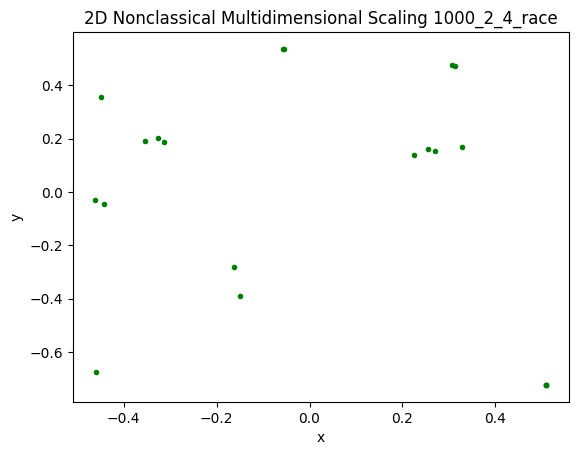

2024-07-30 13:43:36,001 : INFO : PROGRESS: load data
2024-07-30 13:43:36,002 : INFO : PROGRESS: load end
2024-07-30 13:43:36,003 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,003 : INFO : PROGRESS: dc - 0.014480634156947336
2024-07-30 13:43:36,003 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,003 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:36,004 : INFO : PROGRESS: load data
2024-07-30 13:43:36,005 : INFO : PROGRESS: load end
2024-07-30 13:43:36,005 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,005 : INFO : PROGRESS: dc - 0.014480634156947336
2024-07-30 13:43:36,006 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,006 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:36,006 : INFO : PROGRESS: start cluster
2024-07-30 13:43:36,007 : INFO : PROGRESS: ended
2024-07-30 13:43:36,007 : INFO : 1 center as below
2024-07-30 13:43:36,007 : INFO : 6 1.425971 0.668621
2024-07-30 13:

CPU architecture number of rekoobe is 1
Cluster number of rekoobe is 1
Threshold of rekoobe: density 1.4259711503982544, distance 0.6686211824417114


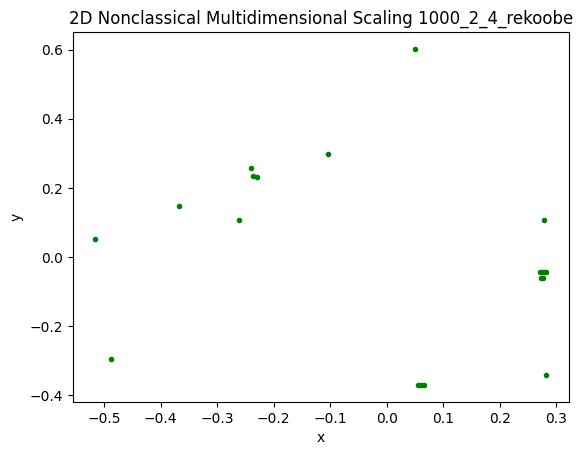

2024-07-30 13:43:36,168 : INFO : PROGRESS: load data
2024-07-30 13:43:36,169 : INFO : PROGRESS: load end
2024-07-30 13:43:36,169 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,169 : INFO : PROGRESS: dc - 0.0012479823399967793
2024-07-30 13:43:36,170 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,170 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:36,171 : INFO : PROGRESS: load data
2024-07-30 13:43:36,171 : INFO : PROGRESS: load end
2024-07-30 13:43:36,172 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,172 : INFO : PROGRESS: dc - 0.0012479823399967793
2024-07-30 13:43:36,172 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,172 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:36,173 : INFO : PROGRESS: start cluster
2024-07-30 13:43:36,173 : INFO : PROGRESS: ended
2024-07-30 13:43:36,173 : INFO : 1 center as below
2024-07-30 13:43:36,174 : INFO : 5 1.367879 1.344799
2024-07-30 1

CPU architecture number of revproxy is 1
Cluster number of revproxy is 1
Threshold of revproxy: density 1.3678793907165527, distance 1.3447991609573364


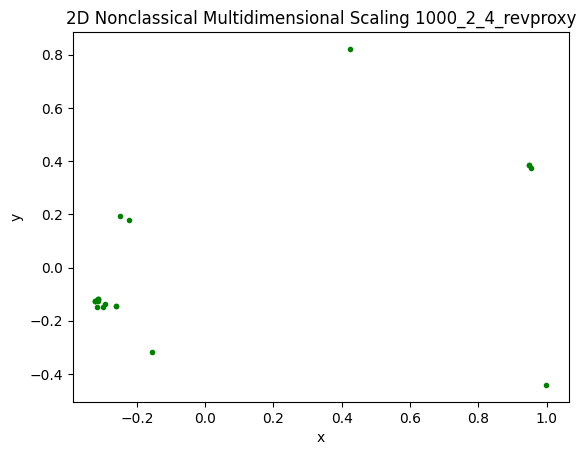

2024-07-30 13:43:36,328 : INFO : PROGRESS: load data
2024-07-30 13:43:36,329 : INFO : PROGRESS: load end
2024-07-30 13:43:36,329 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,330 : INFO : PROGRESS: dc - 0.3551987615705612
2024-07-30 13:43:36,330 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,330 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:36,331 : INFO : PROGRESS: load data
2024-07-30 13:43:36,332 : INFO : PROGRESS: load end
2024-07-30 13:43:36,332 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,332 : INFO : PROGRESS: dc - 0.3551987615705612
2024-07-30 13:43:36,333 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,333 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:36,333 : INFO : PROGRESS: start cluster
2024-07-30 13:43:36,334 : INFO : PROGRESS: ended
2024-07-30 13:43:36,334 : INFO : 1 center as below
2024-07-30 13:43:36,334 : INFO : 6 1.173215 1.159029
2024-07-30 13:43:3

CPU architecture number of rkit is 1
Cluster number of rkit is 1
Threshold of rkit: density 1.1732146739959717, distance 1.1590287685394287


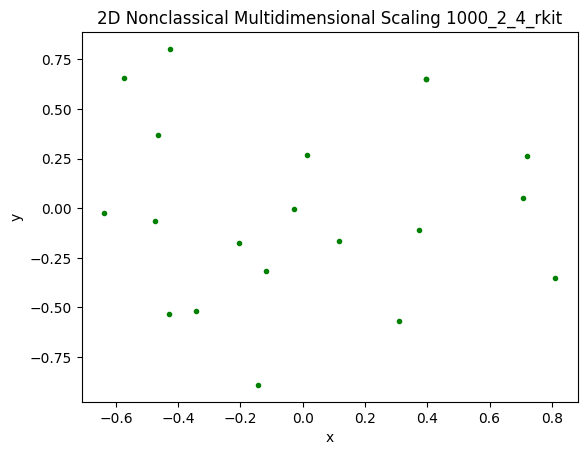

2024-07-30 13:43:36,496 : INFO : PROGRESS: load data
2024-07-30 13:43:36,497 : INFO : PROGRESS: load end
2024-07-30 13:43:36,498 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,498 : INFO : PROGRESS: dc - 0.0
2024-07-30 13:43:36,498 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,499 : INFO : PROGRESS: load data
2024-07-30 13:43:36,501 : INFO : PROGRESS: load end
2024-07-30 13:43:36,501 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,502 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,502 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:36,504 : INFO : PROGRESS: load data
2024-07-30 13:43:36,505 : INFO : PROGRESS: load end
2024-07-30 13:43:36,506 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,506 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,507 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:36,508 : INFO : PROGRESS: start cluster
2024-07-30 13:43:36,508 : INFO

CPU architecture number of sliver is 2
Cluster number of sliver is 2
Threshold of sliver: density 5.0, distance 0.4809507727622986


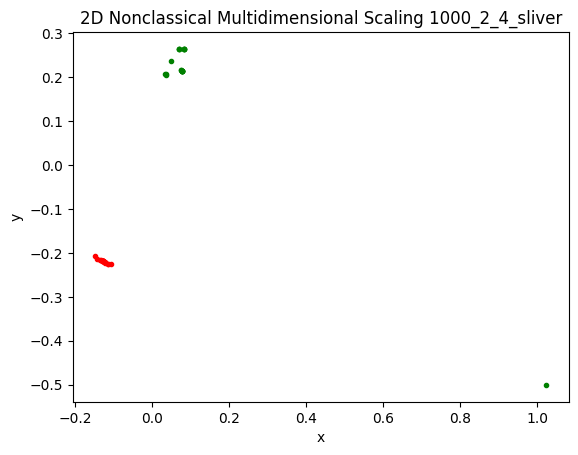

2024-07-30 13:43:36,692 : INFO : PROGRESS: load data
2024-07-30 13:43:36,693 : INFO : PROGRESS: load end
2024-07-30 13:43:36,693 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,693 : INFO : PROGRESS: dc - 0.0
2024-07-30 13:43:36,693 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,694 : INFO : PROGRESS: load data
2024-07-30 13:43:36,694 : INFO : PROGRESS: load end
2024-07-30 13:43:36,695 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,695 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,696 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:36,696 : INFO : PROGRESS: load data
2024-07-30 13:43:36,697 : INFO : PROGRESS: load end
2024-07-30 13:43:36,697 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,698 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,698 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:36,698 : INFO : PROGRESS: start cluster
2024-07-30 13:43:36,699 : INFO

CPU architecture number of sshbrute is 1
Cluster number of sshbrute is 1
Threshold of sshbrute: density 4.0, distance 1.306928277015686


2024-07-30 13:43:36,712 : INFO : PLOT: end mds, start plot


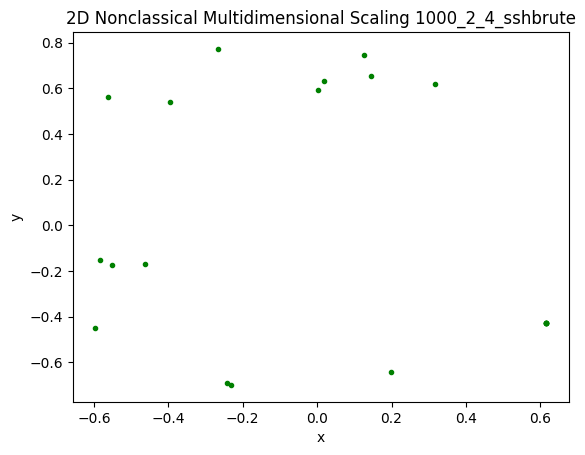

2024-07-30 13:43:36,864 : INFO : PROGRESS: load data
2024-07-30 13:43:36,866 : INFO : PROGRESS: load end
2024-07-30 13:43:36,866 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,866 : INFO : PROGRESS: dc - 0.2898508162017705
2024-07-30 13:43:36,867 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,867 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:36,869 : INFO : PROGRESS: load data
2024-07-30 13:43:36,871 : INFO : PROGRESS: load end
2024-07-30 13:43:36,871 : INFO : PROGRESS: select dc
2024-07-30 13:43:36,871 : INFO : PROGRESS: dc - 0.2898508162017705
2024-07-30 13:43:36,871 : INFO : PROGRESS: compute local density
2024-07-30 13:43:36,872 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:36,873 : INFO : PROGRESS: start cluster
2024-07-30 13:43:36,873 : INFO : PROGRESS: ended
2024-07-30 13:43:36,873 : INFO : 2 center as below
2024-07-30 13:43:36,874 : INFO : 14 1.803265 1.101837
2024-07-30 13:43:

CPU architecture number of sshdoor is 2
Cluster number of sshdoor is 2
Threshold of sshdoor: density 1.80326509475708, distance 1.1018372774124146


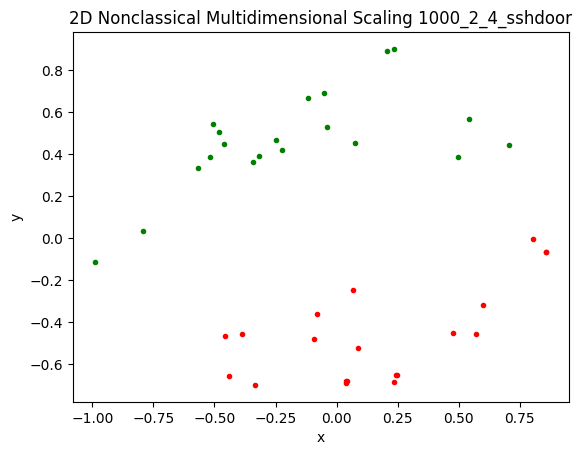

2024-07-30 13:43:37,057 : INFO : PROGRESS: load data
2024-07-30 13:43:37,058 : INFO : PROGRESS: load end
2024-07-30 13:43:37,058 : INFO : PROGRESS: select dc
2024-07-30 13:43:37,058 : INFO : PROGRESS: dc - 0.0013951193384366426
2024-07-30 13:43:37,059 : INFO : PROGRESS: compute local density
2024-07-30 13:43:37,059 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:37,060 : INFO : PROGRESS: load data
2024-07-30 13:43:37,061 : INFO : PROGRESS: load end
2024-07-30 13:43:37,061 : INFO : PROGRESS: select dc
2024-07-30 13:43:37,061 : INFO : PROGRESS: dc - 0.0013951193384366426
2024-07-30 13:43:37,061 : INFO : PROGRESS: compute local density
2024-07-30 13:43:37,062 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:37,062 : INFO : PROGRESS: start cluster
2024-07-30 13:43:37,062 : INFO : PROGRESS: ended
2024-07-30 13:43:37,063 : INFO : 1 center as below
2024-07-30 13:43:37,063 : INFO : 7 1.367879 0.331800
2024-07-30 1

CPU architecture number of stowaway is 1
Cluster number of stowaway is 1
Threshold of stowaway: density 1.3678793907165527, distance 0.33180004358291626


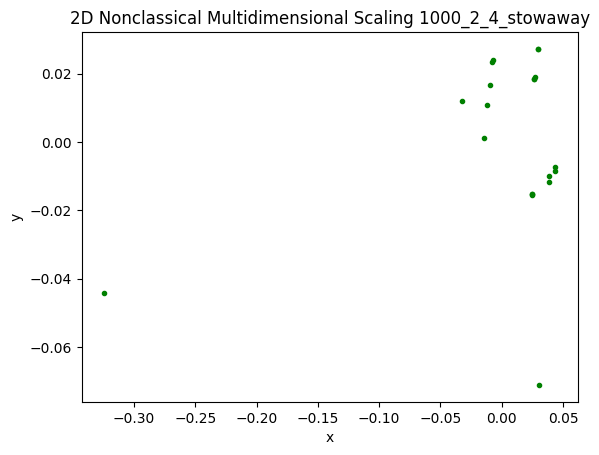

2024-07-30 13:43:37,215 : INFO : PROGRESS: load data
2024-07-30 13:43:37,216 : INFO : PROGRESS: load end
2024-07-30 13:43:37,216 : INFO : PROGRESS: select dc
2024-07-30 13:43:37,216 : INFO : PROGRESS: dc - 0.16506901765070783
2024-07-30 13:43:37,217 : INFO : PROGRESS: compute local density
2024-07-30 13:43:37,217 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:37,218 : INFO : PROGRESS: load data
2024-07-30 13:43:37,219 : INFO : PROGRESS: load end
2024-07-30 13:43:37,219 : INFO : PROGRESS: select dc
2024-07-30 13:43:37,219 : INFO : PROGRESS: dc - 0.16506901765070783
2024-07-30 13:43:37,219 : INFO : PROGRESS: compute local density
2024-07-30 13:43:37,220 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:37,220 : INFO : PROGRESS: start cluster
2024-07-30 13:43:37,220 : INFO : PROGRESS: ended
2024-07-30 13:43:37,221 : INFO : 1 center as below
2024-07-30 13:43:37,221 : INFO : 3 1.539212 1.212484
2024-07-30 13:43

CPU architecture number of triada is 1
Cluster number of triada is 1
Threshold of triada: density 1.5392121076583862, distance 1.2124841213226318


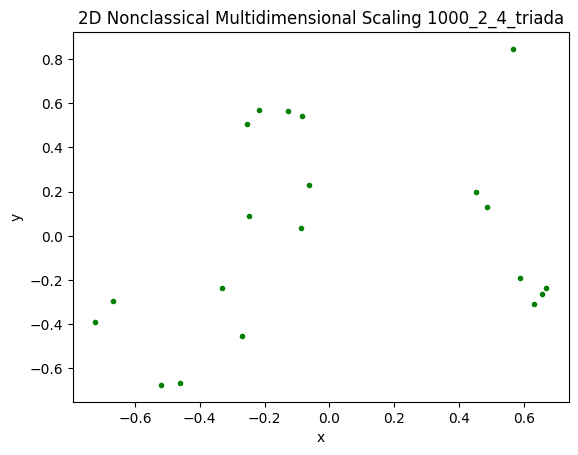

2024-07-30 13:43:37,390 : INFO : PROGRESS: load data
2024-07-30 13:43:37,396 : INFO : PROGRESS: load end
2024-07-30 13:43:37,397 : INFO : PROGRESS: select dc
2024-07-30 13:43:37,398 : INFO : PROGRESS: dc - 0.13993155234485372
2024-07-30 13:43:37,398 : INFO : PROGRESS: compute local density
2024-07-30 13:43:37,400 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:37,402 : INFO : PROGRESS: load data
2024-07-30 13:43:37,408 : INFO : PROGRESS: load end
2024-07-30 13:43:37,409 : INFO : PROGRESS: select dc
2024-07-30 13:43:37,409 : INFO : PROGRESS: dc - 0.13993155234485372
2024-07-30 13:43:37,410 : INFO : PROGRESS: compute local density
2024-07-30 13:43:37,411 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:37,413 : INFO : PROGRESS: start cluster
2024-07-30 13:43:37,414 : INFO : PROGRESS: ended
2024-07-30 13:43:37,414 : INFO : 4 center as below
2024-07-30 13:43:37,415 : INFO : PROGRESS: load data


CPU architecture number of tsunami is 4
Cluster number of tsunami is 4
Threshold of tsunami: density 2.035982370376587, distance 0.8002073168754578
Samples number of tsunami is 4 is not enough
Use the other cluster threshold
Cluster number of tsunami is 4
Threshold of tsunami: density 1.438531517982483, distance 0.9973410964012146


2024-07-30 13:43:37,421 : INFO : PROGRESS: load end
2024-07-30 13:43:37,422 : INFO : PROGRESS: select dc
2024-07-30 13:43:37,422 : INFO : PROGRESS: dc - 0.13993155234485372
2024-07-30 13:43:37,423 : INFO : PROGRESS: compute local density
2024-07-30 13:43:37,424 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:37,426 : INFO : PROGRESS: start cluster
2024-07-30 13:43:37,427 : INFO : PROGRESS: ended
2024-07-30 13:43:37,427 : INFO : 4 center as below
2024-07-30 13:43:37,427 : INFO : 19 1.438532 1.090237
2024-07-30 13:43:37,428 : INFO : 39 3.456419 0.997341
2024-07-30 13:43:37,428 : INFO : 48 5.536457 1.384858
2024-07-30 13:43:37,428 : INFO : 70 4.342539 1.384858
2024-07-30 13:43:37,428 : INFO : PLOT: cluster result, start multi-dimensional scaling
2024-07-30 13:43:37,467 : INFO : PLOT: end mds, start plot


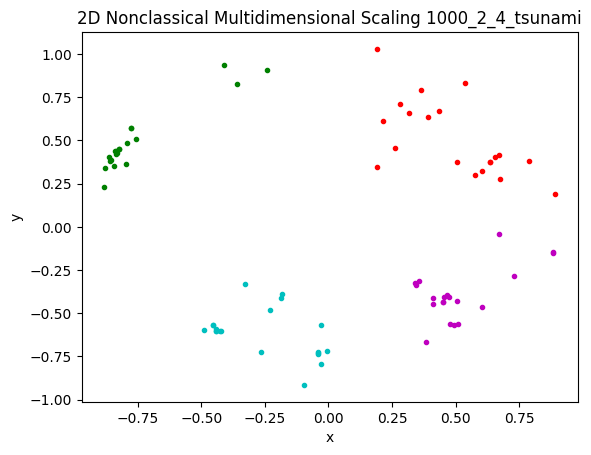

2024-07-30 13:43:37,654 : INFO : PROGRESS: load data
2024-07-30 13:43:37,655 : INFO : PROGRESS: load end
2024-07-30 13:43:37,655 : INFO : PROGRESS: select dc
2024-07-30 13:43:37,655 : INFO : PROGRESS: dc - 0.018974560277530892
2024-07-30 13:43:37,656 : INFO : PROGRESS: compute local density
2024-07-30 13:43:37,656 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:37,657 : INFO : PROGRESS: load data
2024-07-30 13:43:37,658 : INFO : PROGRESS: load end
2024-07-30 13:43:37,658 : INFO : PROGRESS: select dc
2024-07-30 13:43:37,658 : INFO : PROGRESS: dc - 0.018974560277530892
2024-07-30 13:43:37,659 : INFO : PROGRESS: compute local density
2024-07-30 13:43:37,659 : INFO : PROGRESS: compute min distance to nearest higher density neigh
2024-07-30 13:43:37,659 : INFO : PROGRESS: start cluster
2024-07-30 13:43:37,660 : INFO : PROGRESS: ended
2024-07-30 13:43:37,660 : INFO : 1 center as below
2024-07-30 13:43:37,660 : INFO : 10 1.984131 0.450505
2024-07-30 13

CPU architecture number of vtflooder is 1
Cluster number of vtflooder is 1
Threshold of vtflooder: density 1.984131097793579, distance 0.45050477981567383


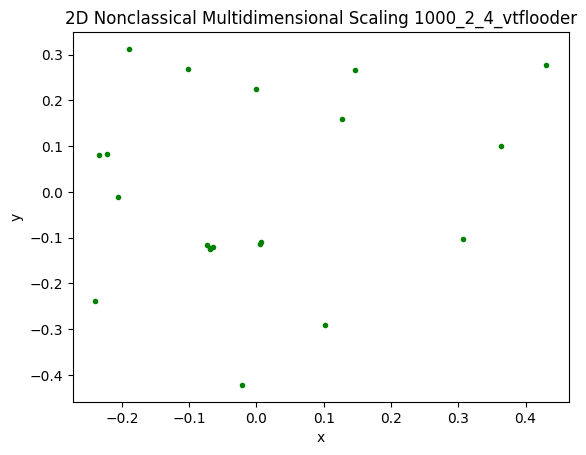

In [40]:
from plot import plot


if detector.cluster and detector.cluster_method == "density":
    plot = plot(detector, False)

    if clusterLabel is None:
        get_cluster_distance(train_X, train_y, train_map, detector, filePrefix)
        clusterLabel = get_cluster_result(train_map, train_X, detector, dataset, filePrefix, plot, filePath, False)

In [41]:
from plot import plot 
# based on prototype distance between cluster center
if detector.cluster and detector.cluster_method == "density_recursive":
    plot = plot(detector, False)
    if clusterLabel is None:
        get_cluster_distance(train_X, train_y, train_map, detector, filePrefix)
        clusterLabel = get_cluster_result(train_map, train_X, detector, dataset, filePrefix, plot, filePath, True)


In [42]:
# print complete cluster label
print("Cluster Label Shape: ", clusterLabel.shape)
print("Cluster unique label: ", np.unique(clusterLabel))


Cluster Label Shape:  (900,)
Cluster unique label:  ['aenjaris_9.0' 'blueshell_3.0' 'bpfdoor_9.0' 'chisel_1.0' 'cornelgen_1.0'
 'cryptonote_16.0' 'dnsamp_3.0' 'dnsamp_36.0' 'dropperl_8.0'
 'drtycow_17.0' 'ezuriloader_8.0' 'fritzfrog_3.0' 'fscan_13.0'
 'gafgyt_18.0' 'gafgyt_28.0' 'gafgyt_48.0' 'gafgyt_74.0' 'hive_2.0'
 'horsepill_6.0' 'lady_12.0' 'malsource_12.0' 'mirai_1.0' 'mirai_4.0'
 'mirai_53.0' 'mirai_72.0' 'pnscan_12.0' 'pnscan_25.0' 'poseidon_1.0'
 'psybnc_3.0' 'race_4.0' 'rekoobe_6.0' 'revproxy_5.0' 'rkit_6.0'
 'sliver_3.0' 'sliver_30.0' 'sshbrute_6.0' 'sshdoor_14.0' 'sshdoor_23.0'
 'stowaway_7.0' 'triada_3.0' 'tsunami_19.0' 'tsunami_39.0' 'tsunami_48.0'
 'tsunami_70.0' 'vtflooder_10.0']


In [43]:
import pickle

new_label_mapping = dict()
if detector.cluster:
    new_label = 0
    for key, value in train_map.items():
        indexPath = f"{detector.clusterDataFolder}/{detector.cpuArch}/{filePrefix}_{value}_index.pickle"
        with open(indexPath, 'rb') as handle:
            index = pickle.load(handle)
        unique, count = np.unique(clusterLabel[index], return_counts=True)
        labelList = []
        for u in unique:
            labelList.append(new_label)
            clusterLabel[clusterLabel == u] = new_label
            new_label += 1
        new_label_mapping[key] = labelList
    clusterLabel = np.array(clusterLabel, dtype=np.int32)


In [46]:
print("label_mapping:")
print(train_map)
print("new_label_mapping:")
print(new_label_mapping)
unique, count = np.unique(clusterLabel, return_counts=True)
for u, c in zip(unique, count):
    print("unique: ", u, " count: ", c)

label_mapping:
{0: 'aenjaris', 1: 'blueshell', 2: 'bpfdoor', 3: 'chisel', 4: 'cornelgen', 5: 'cryptonote', 6: 'dnsamp', 7: 'dropperl', 8: 'drtycow', 9: 'ezuriloader', 10: 'fritzfrog', 11: 'fscan', 12: 'gafgyt', 13: 'hive', 14: 'horsepill', 15: 'lady', 16: 'malsource', 17: 'mirai', 18: 'pnscan', 19: 'poseidon', 20: 'psybnc', 21: 'race', 22: 'rekoobe', 23: 'revproxy', 24: 'rkit', 25: 'sliver', 26: 'sshbrute', 27: 'sshdoor', 28: 'stowaway', 29: 'triada', 30: 'tsunami', 31: 'vtflooder'}
new_label_mapping:
{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6, 7], 7: [8], 8: [9], 9: [10], 10: [11], 11: [12], 12: [13, 14, 15, 16], 13: [17], 14: [18], 15: [19], 16: [20], 17: [21, 22, 23, 24], 18: [25, 26], 19: [27], 20: [28], 21: [29], 22: [30], 23: [31], 24: [32], 25: [33, 34], 26: [35], 27: [36, 37], 28: [38], 29: [39], 30: [40, 41, 42, 43], 31: [44]}
unique:  0  count:  20
unique:  1  count:  20
unique:  2  count:  20
unique:  3  count:  20
unique:  4  count:  20
unique:  5  count:  20
un

## Training(Cluster)

In [47]:
if detector.cluster:
    detector.trainModel(train_X=train_X, train_Y=clusterLabel, val_X=val_X, val_Y=val_y, save_model=True, new_label_mapping=new_label_mapping)

Classes per iteration: 45
N-shot: 5
=== Epoch: 0 ===
Avg Train Loss: 1.5144144189357758, Avg Train Acc: 0.514000001847744 (Best)
Avg Val Loss: 0.5246913094818592, Avg Val Acc: 0.7751999974250794 (Best)
=== Epoch: 1 ===
Avg Train Loss: 0.9181529474258423, Avg Train Acc: 0.6860888862609863 (Best: 0.7751999974250794)
Avg Val Loss: 0.5893322414159775, Avg Val Acc: 0.7692000013589859 (Best: 0.7751999974250794)
=== Epoch: 2 ===
Avg Train Loss: 0.7677500587701798, Avg Train Acc: 0.7362666696310043 (Best: 0.7751999974250794)
Avg Val Loss: 0.527523692548275, Avg Val Acc: 0.8028000020980834 (Best)
=== Epoch: 3 ===
Avg Train Loss: 0.6845217114686966, Avg Train Acc: 0.7663555544614792 (Best: 0.8028000020980834)
Avg Val Loss: 0.5143753600120544, Avg Val Acc: 0.8068000048398971 (Best)
=== Epoch: 4 ===
Avg Train Loss: 0.6427441799640655, Avg Train Acc: 0.7798222208023071 (Best: 0.8068000048398971)
Avg Val Loss: 0.653494267910719, Avg Val Acc: 0.7828000015020371 (Best: 0.8068000048398971)
=== Epoch: 5

## Testing(Cluster)

In [51]:
# Test the model 
detector.testModel(test_X, test_y, new_label_mapping)

Test Acc: 0.765360000193119


0.765360000193119

## Training(No Cluster)

In [10]:
if detectorNoCluster.train:
    detectorNoCluster.trainModel(train_X=train_X, train_Y = train_y, val_X=val_X, val_Y=val_y, save_model=True)


Classes per iteration: 32
N-shot: 5
=== Epoch: 0 ===
Avg Train Loss: 1.066548654437065, Avg Train Acc: 0.6461249998211861 (Best)
Avg Val Loss: 0.7059923511743545, Avg Val Acc: 0.7377333316206932 (Best)
Model saved at ./model/model_crossArch_withVal.pt
=== Epoch: 1 ===


/home/mandy900619/anaconda3/envs/smell/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Avg Train Loss: 0.7852210289239884, Avg Train Acc: 0.7332499986886978 (Best: 0.7377333316206932)
Avg Val Loss: 0.7702614802122116, Avg Val Acc: 0.7348000019788742 (Best: 0.7377333316206932)
=== Epoch: 2 ===
Avg Train Loss: 0.7218584251403809, Avg Train Acc: 0.7531874996423721 (Best)
Avg Val Loss: 0.8433799096941947, Avg Val Acc: 0.7190666687488556 (Best: 0.7377333316206932)
=== Epoch: 3 ===
Avg Train Loss: 0.6898100101947784, Avg Train Acc: 0.7648749965429306 (Best)
Avg Val Loss: 0.7618294581770897, Avg Val Acc: 0.7423999989032746 (Best)
Model saved at ./model/model_crossArch_withVal.pt
=== Epoch: 4 ===
Avg Train Loss: 0.6646294152736664, Avg Train Acc: 0.7728750026226043 (Best)
Avg Val Loss: 0.7432574689388275, Avg Val Acc: 0.7502666652202606 (Best)
Model saved at ./model/model_crossArch_withVal.pt
=== Epoch: 5 ===
Avg Train Loss: 0.6407594814896583, Avg Train Acc: 0.7828125035762787 (Best)
Avg Val Loss: 0.6821803125739098, Avg Val Acc: 0.7700000005960465 (Best)
Model saved at ./model

## Testing(No Cluster)

In [11]:
detectorNoCluster.testModel(test_X=test_X, test_Y=test_y)

Test Acc: 0.7430666678845882


0.7430666678845882

## Plot

In [48]:
from plot import plot
import numpy as np
plot_ = plot(detector)

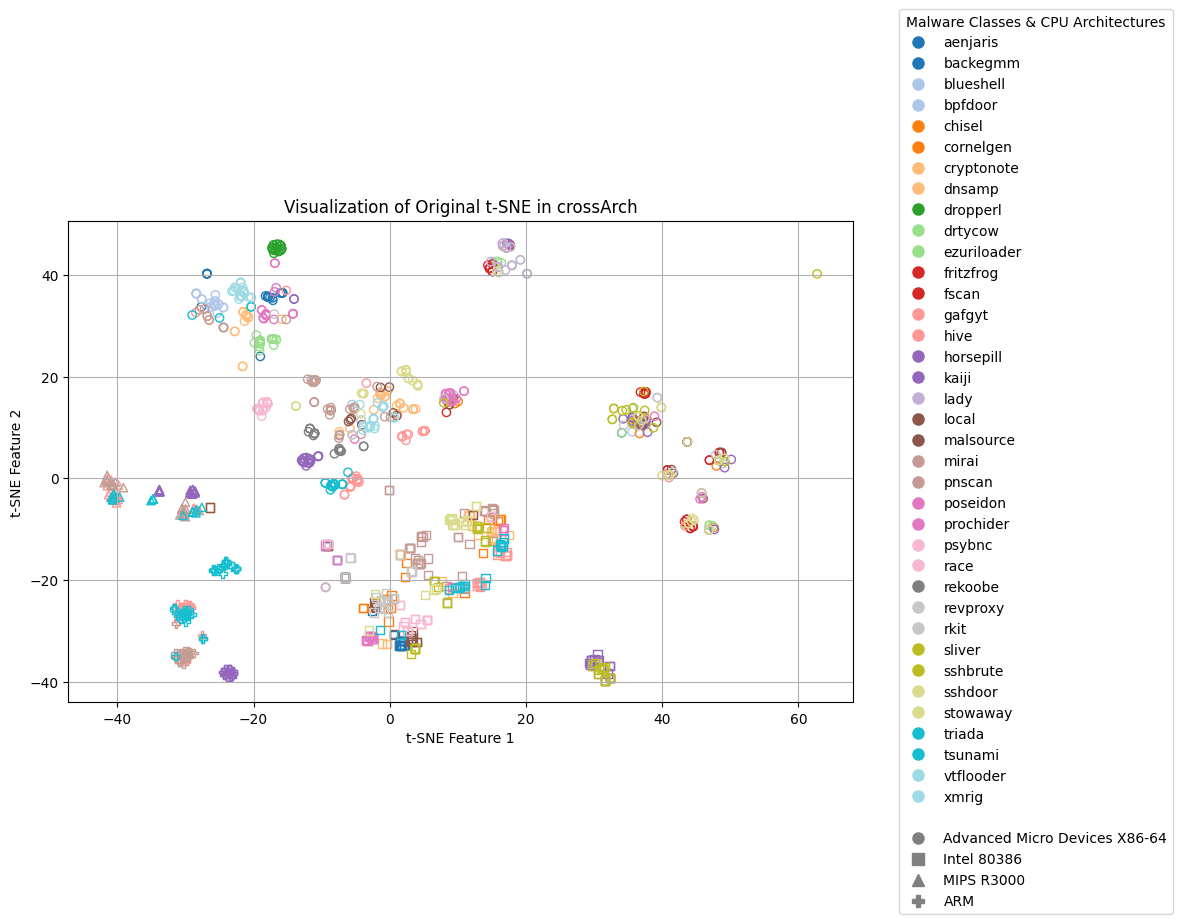

In [50]:
import numpy as np

plot_.plot_cpuArch_tsne(train_X, dataset.trainData["CPU"].values,  train_y, train_map)

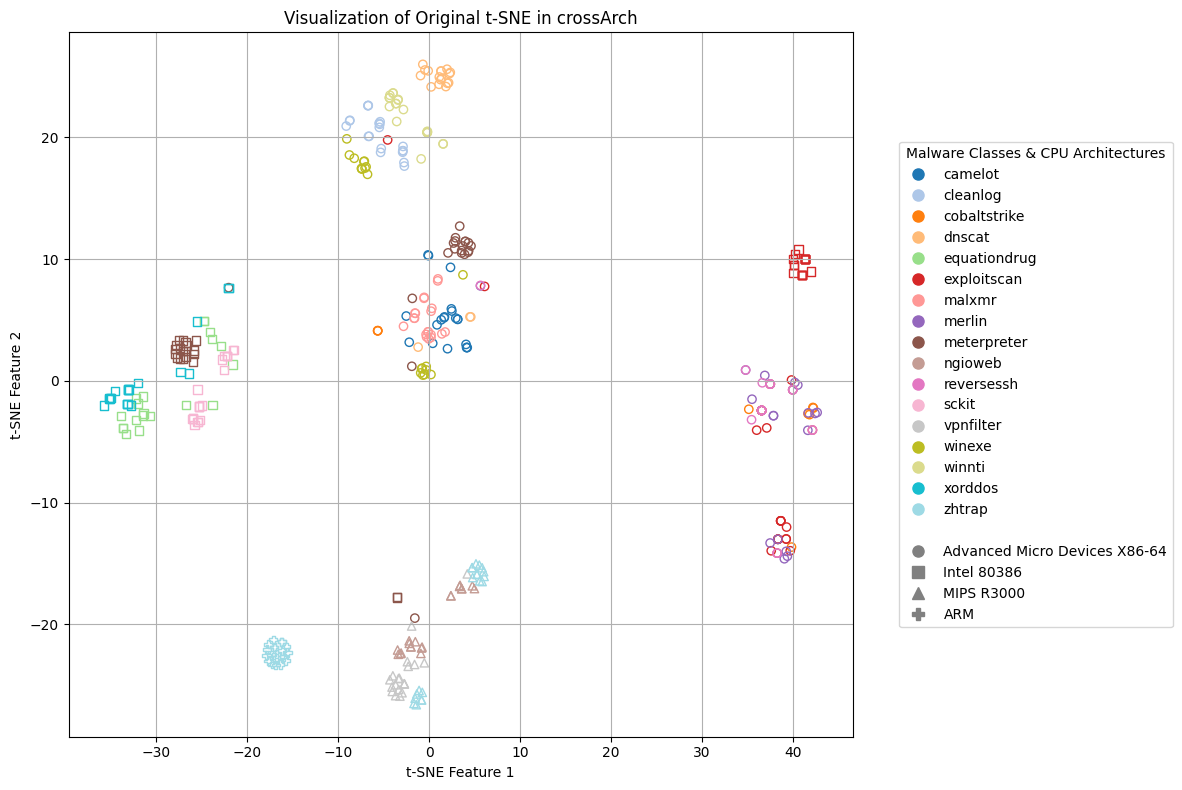

In [51]:
plot_.plot_original_tsne(test_X, dataset.testData["CPU"].values, test_y, test_map)

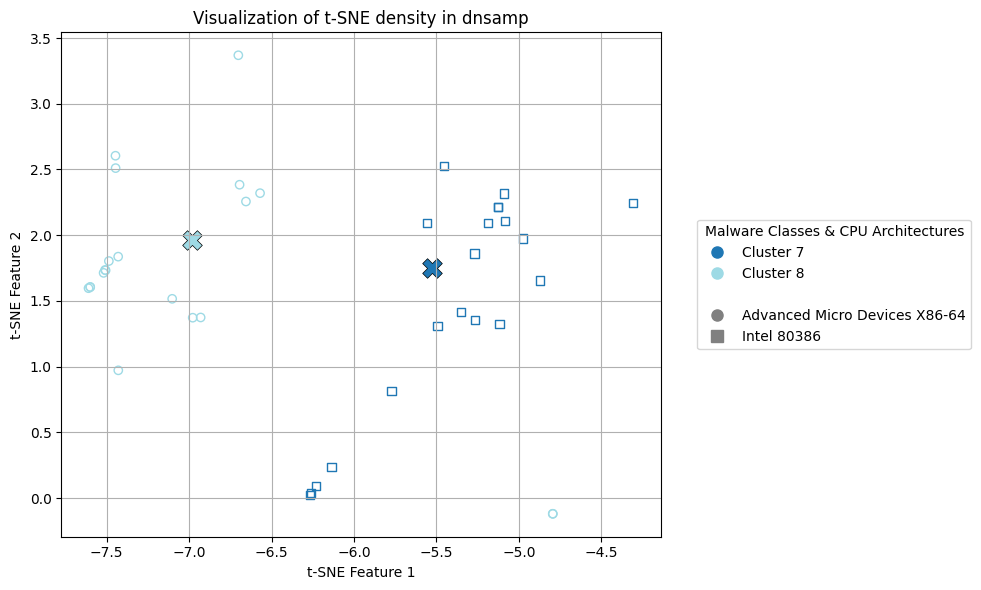

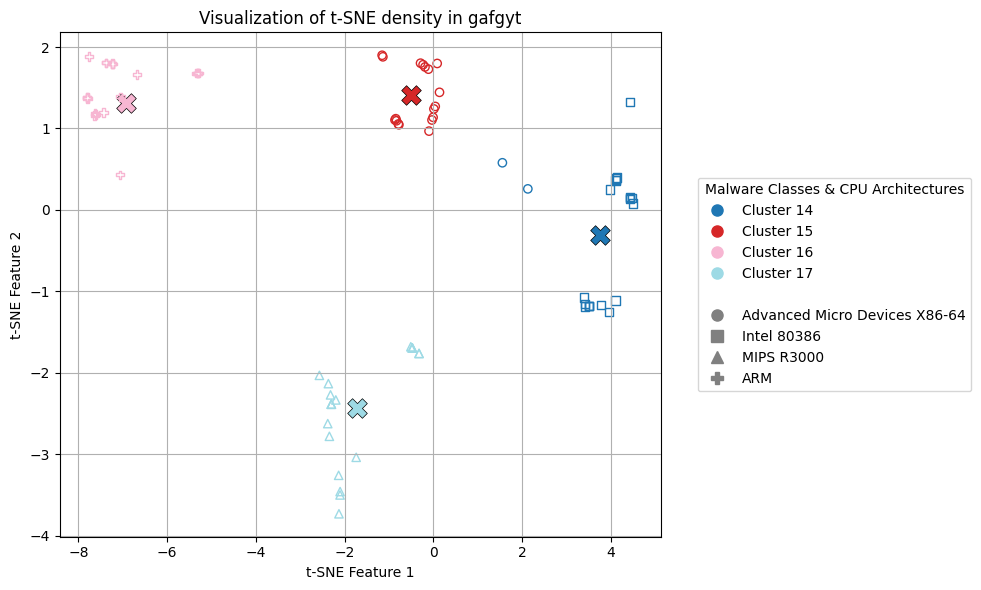

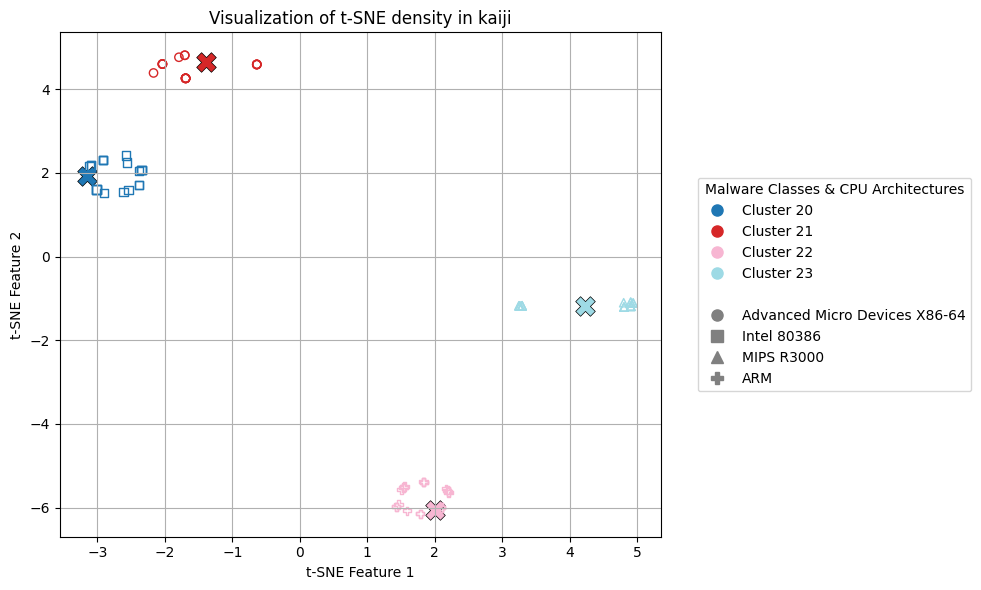

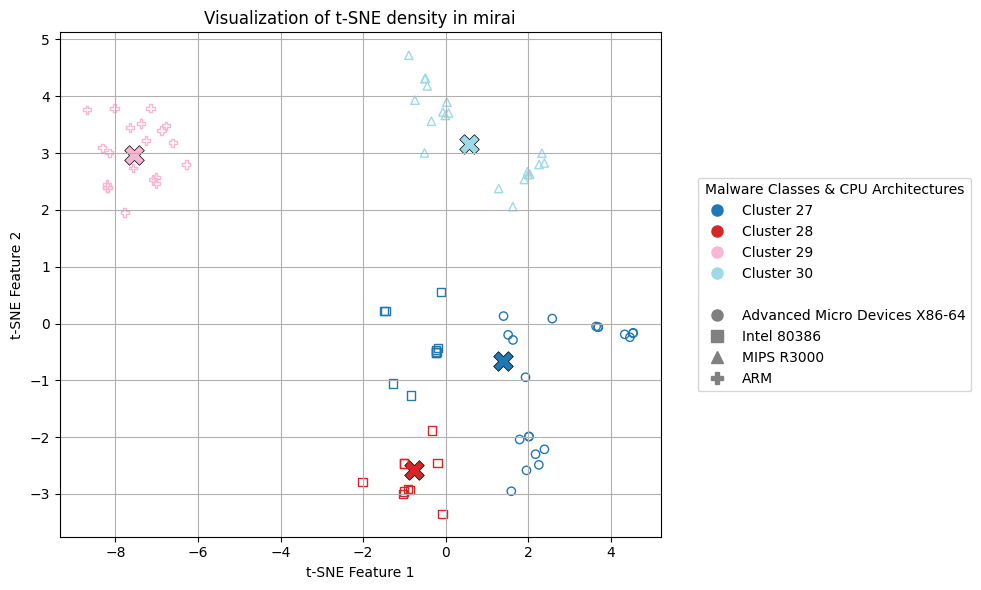

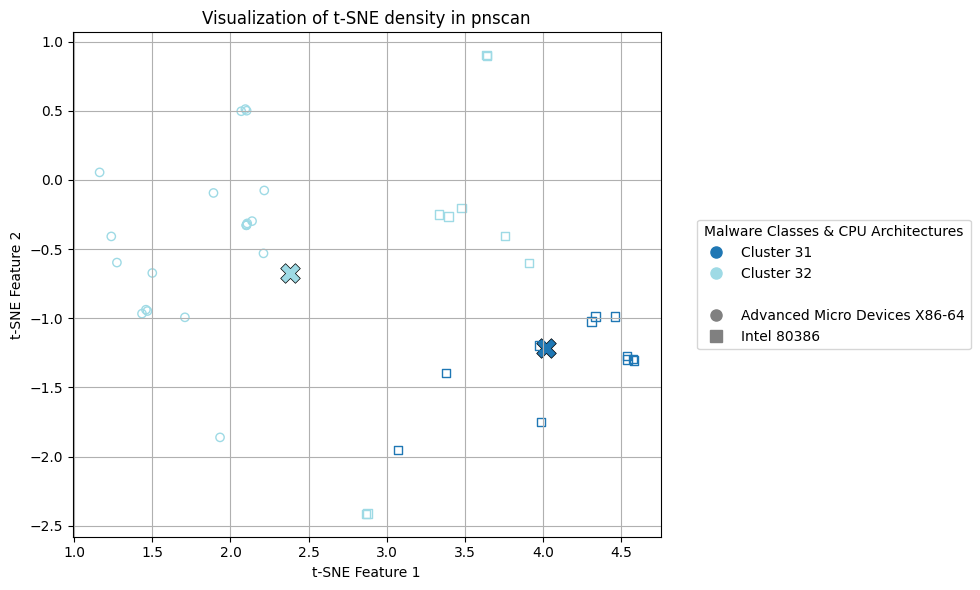

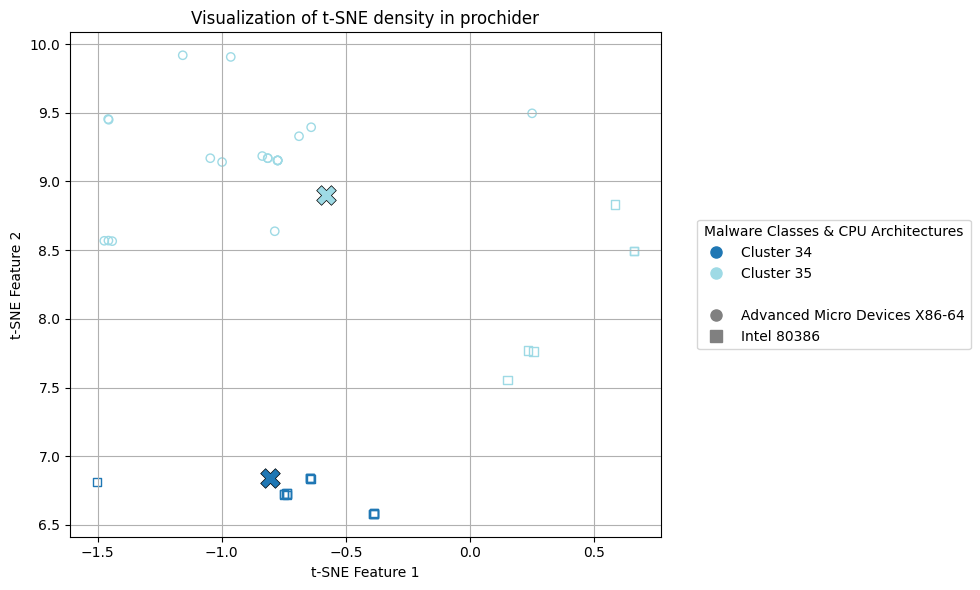

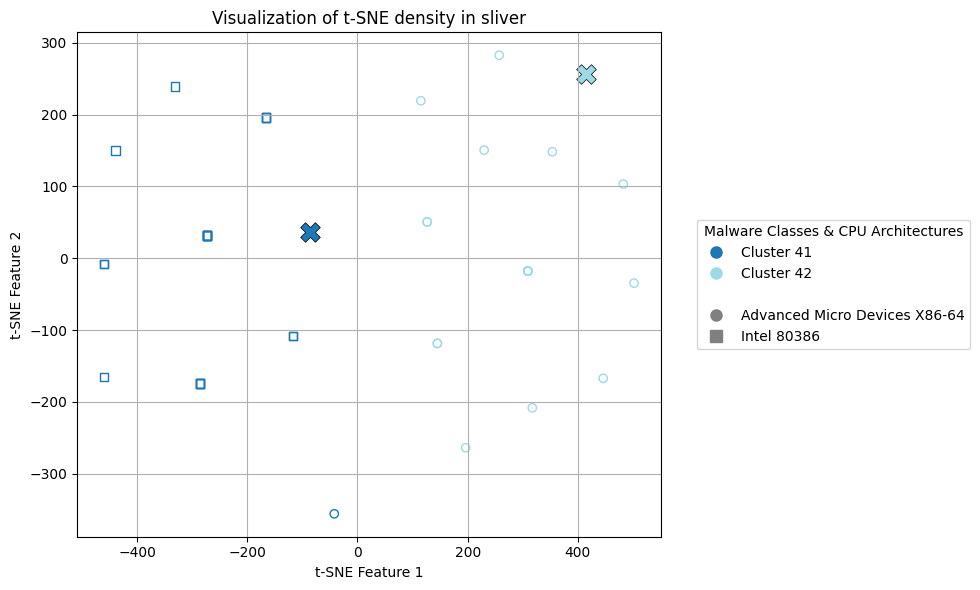

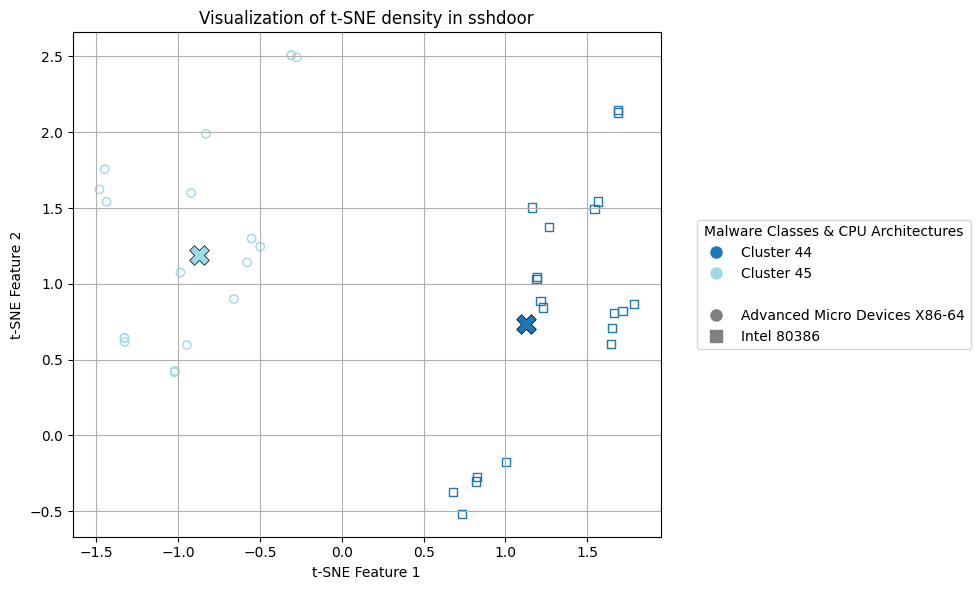

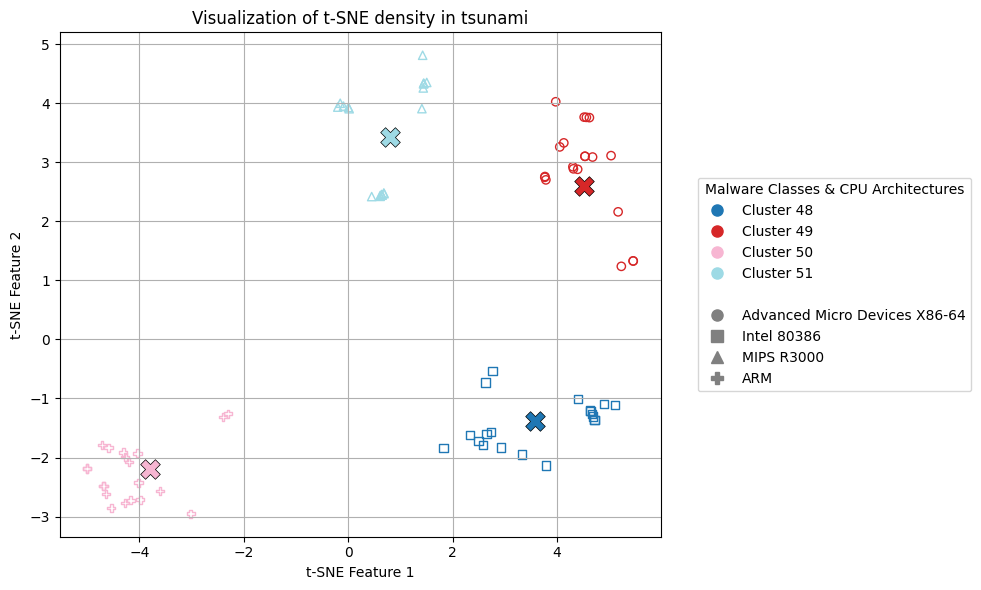

In [49]:
# plot architecture of density clustering 
if detector.cluster:
    for key in train_map.keys():
        filePrefix = f"{featureDim}_{n_gramRange[0]}_{n_gramRange[1]}"
        indexPath = f"{detector.clusterDataFolder}/{detector.cpuArch}/{filePrefix}_{train_map[key]}_index.pickle"
        index = np.load(indexPath, allow_pickle=True)
        plotData = train_X[index]
        cpuList = dataset.trainData["CPU"].values[index]
        plotLabel = clusterLabel[index]
        if len(new_label_mapping[key]) == 1:
            continue
        plot_.plot_tsne_cluster(plotData, cpuList, train_map[key], plotLabel)

### Plot cluster experiment

In [ ]:
from prototypeLearning import prototypical_loss, prototypical_loss_using_proto, get_prototypes
import torch
from prototypeLearning import PrototypeNet, ByteSequenceEmbedding, ByteSequenceSampler
from torch.utils.data import DataLoader, TensorDataset, Sampler

data_tensor = torch.tensor(vectorzieTest)
label_tensor = torch.tensor(y_test_label)

embedding_model = ByteSequenceEmbedding(data_tensor.shape[1], detector.hidden_size, detector.output_size, detector.dropout_prob)       
model = PrototypeNet(embedding_model)

model.load_state_dict(torch.load(f"{detector.modelFolder}/{detector.model_name}.pt"))
model.eval()
embeddings = model(data_tensor.float())
y = y_train_label
if detector.cluster:
    y = clusterLabel

y = y.astype(int)

data_tensor_ = torch.tensor(vectorzieTrain)
label_tensor_ = torch.tensor(y)
trainDataset = TensorDataset(data_tensor_, label_tensor_)
sampler = ByteSequenceSampler(y, detector.support_shots + detector.query_shots, detector.class_per_iter, detector.iterations) # support + query
trainLoader = DataLoader(trainDataset, batch_sampler=sampler)
prototypes = get_prototypes(model, trainLoader, detector.support_shots)
prototypes_torch = torch.tensor([])
for key in prototypes:
    prototypes_torch = torch.cat((prototypes_torch, prototypes[key].unsqueeze(0)), 0)
acc, pred_y = prototypical_loss_using_proto(embeddings, target=label_tensor, prototypes=prototypes, label_mapping=new_label_mapping)
pred_y = pred_y.reshape(-1)
print(acc)
plot_.plot_visualize_embeddings(prototypes_torch, embeddings, query_labels=label_tensor, label_mapping=new_label_mapping, pred_y=pred_y, original_label=label_mapping)
plot_.plot_confusion_matrix(label_tensor, pred_y, label_mapping, normalize=True, title='Confusion matrix')


### Plot No cluster experiment

In [23]:
from plot import plot
import numpy as np
plotNoCluster = plot(detectorNoCluster)

tensor(0.8602)
Query 0 is misclassified as 28 at index 7
Query 0 is misclassified as 28 at index 14
Query 1 is misclassified as 8 at index 15
Query 1 is misclassified as 19 at index 16
Query 1 is misclassified as 8 at index 18
Query 1 is misclassified as 19 at index 22
Query 1 is misclassified as 19 at index 25
Query 2 is misclassified as 20 at index 28
Query 2 is misclassified as 20 at index 29
Query 2 is misclassified as 20 at index 32
Query 2 is misclassified as 20 at index 34
Query 2 is misclassified as 20 at index 35
Query 2 is misclassified as 20 at index 37
Query 2 is misclassified as 20 at index 39
Query 2 is misclassified as 20 at index 40
Query 3 is misclassified as 13 at index 42
Query 3 is misclassified as 24 at index 54
Query 3 is misclassified as 13 at index 55
Query 6 is misclassified as 16 at index 91
Query 6 is misclassified as 27 at index 93
Query 6 is misclassified as 16 at index 97
Query 6 is misclassified as 27 at index 101
Query 8 is misclassified as 1 at index 11

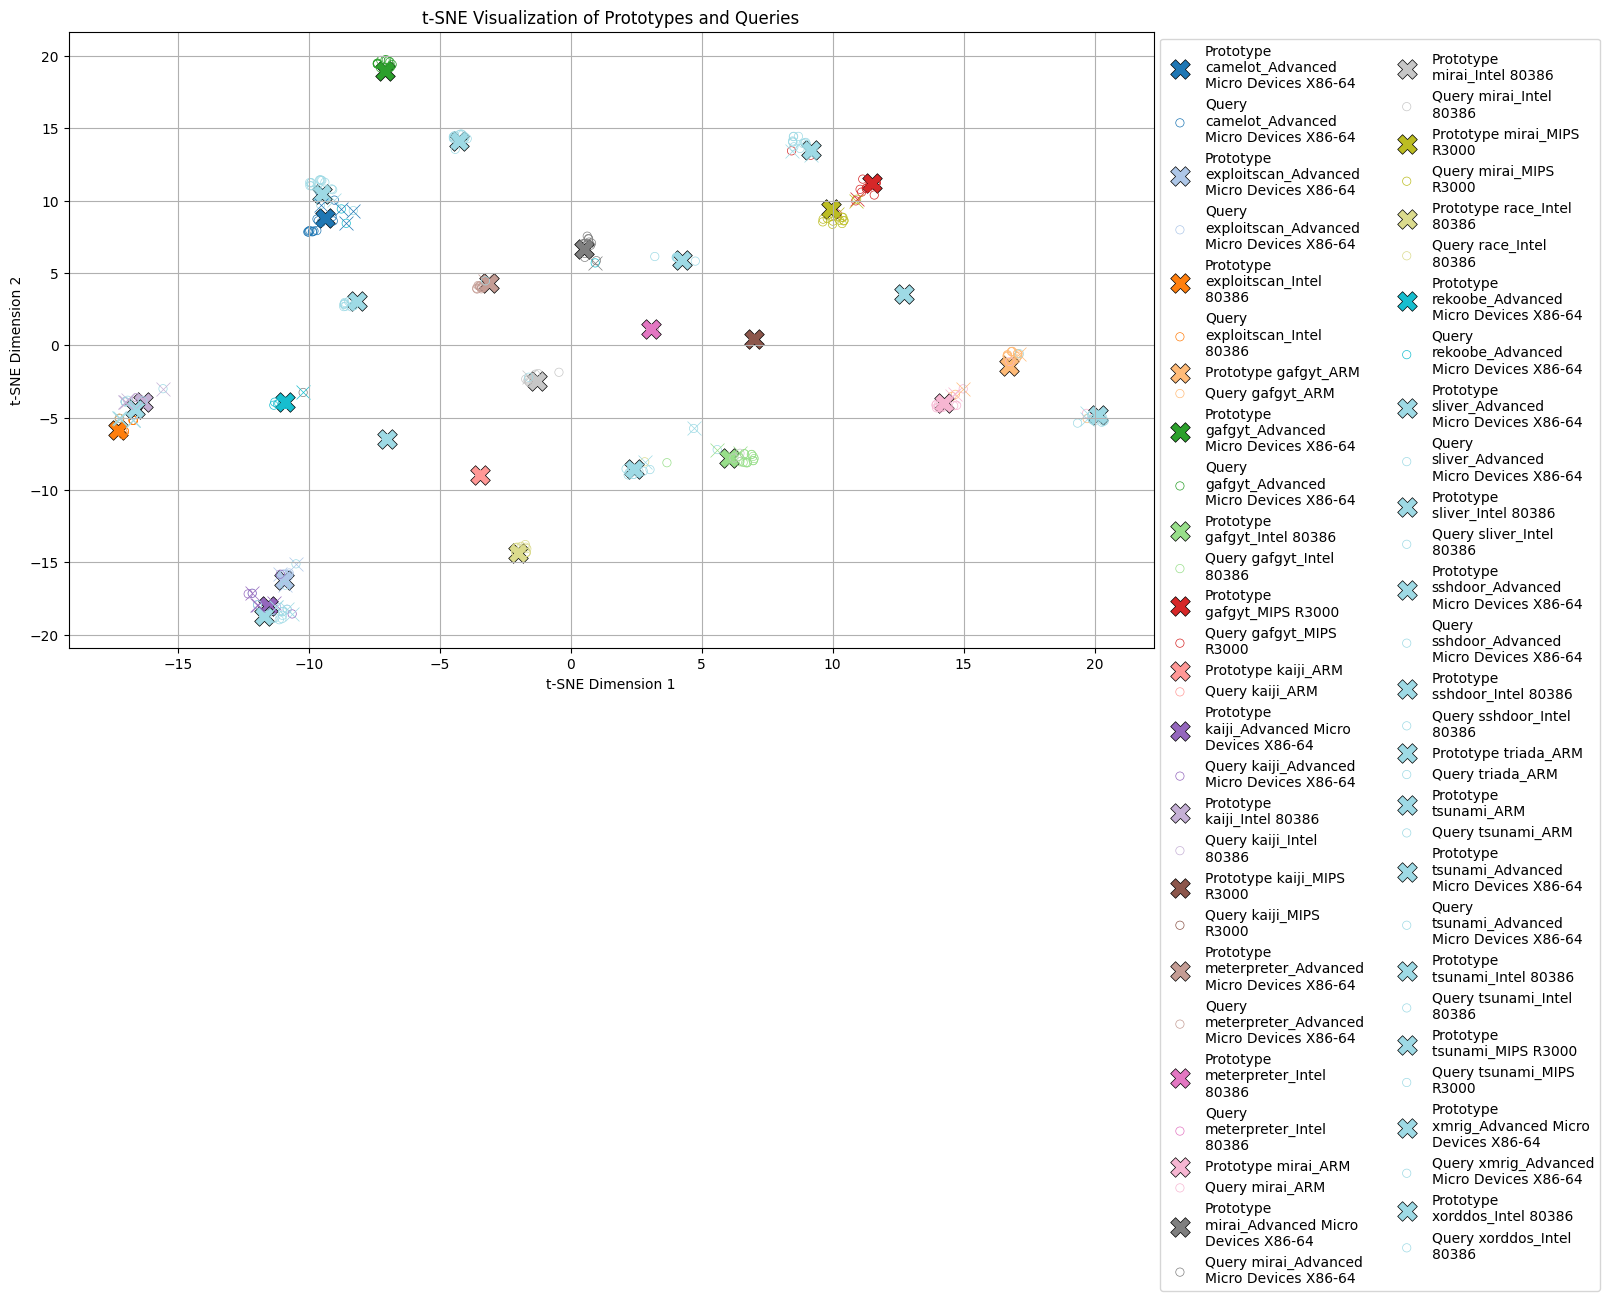

Normalized confusion matrix
[[0.86666667 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.13333333 0.        ]
 [0.         0.61538462 0.         0.         0.         0.
  0.         0.         0.15384615 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.23076923 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.42857143 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.57142857 0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.8       

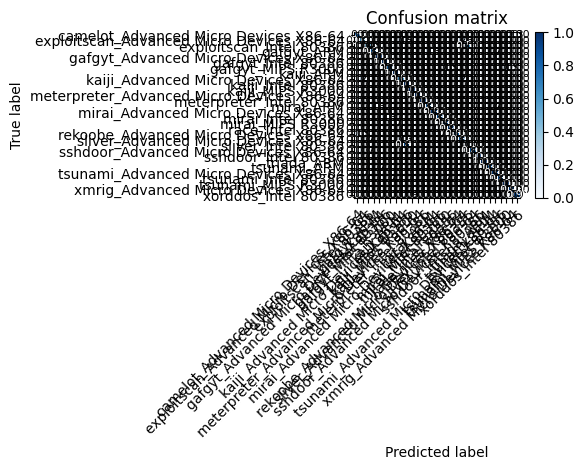

In [24]:
from prototypeLearning import prototypical_loss_test
import torch

data_tensor = torch.tensor(vectorzieTest)
label_tensor = torch.tensor(y_test_label)


embedding_model = ByteSequenceEmbedding(data_tensor.shape[1], detectorNoCluster.hidden_size, detectorNoCluster.output_size, detectorNoCluster.dropout_prob)       
model = PrototypeNet(embedding_model)

model.load_state_dict(torch.load(f"{detectorNoCluster.modelFolder}/{detectorNoCluster.model_name}.pt"))
model.eval()
embeddings = model(data_tensor.float())
_, acc, prototypes_torch, _, query_embeddings, target_inds, pred_y = prototypical_loss_test(embeddings, target=label_tensor, n_support=detectorNoCluster.support_shots)
pred_y = pred_y.reshape(-1)

print(acc)
plotNoCluster.plot_visualize_embeddings(prototypes_torch, query_embeddings, query_labels=target_inds, label_mapping=label_mapping, pred_y=pred_y)
plotNoCluster.plot_confusion_matrix(target_inds, pred_y, label_mapping, normalize=True, title='Confusion matrix')
